In [1]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
import zipfile
import os

zip_path = "/content/drive/My Drive/archive (1).zip"  # Change the file name if needed
extract_to = "/content/drive/My Drive/BrainTumorData"  # Folder where files will be extracted

# Extract the ZIP file
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_to)

print("Extraction Complete!")


Extraction Complete!


In [ ]:
!ls "/content/drive/My Drive/BrainTumorData"


augmented_data	brain_tumor_dataset  model_weights  no	yes


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os, shutil
import cv2
import matplotlib.image as mpimg
import seaborn as sns
%matplotlib inline
plt.style.use('ggplot')

In [ ]:
import zipfile
import os

# Define paths
zip_path = "/content/drive/My Drive/archive (1).zip"  # Update if needed
extract_to = "/content/BrainTumorData"  # Extract to Colab's local storage

# Extract ZIP file
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_to)

print("Extraction Complete!")

# List extracted files to verify
print("Extracted files:", os.listdir(extract_to))

Extraction Complete!
Extracted files: ['no', 'brain_tumor_dataset', 'yes']


In [ ]:
# EDA(Exploratory Data Analysis)

In [ ]:
import os

# # Define correct paths
# yes_path = "/content/BrainTumorData/yes"
# no_path = "/content/BrainTumorData/no"

# # Count files in 'yes' folder
# list_yes = os.listdir(yes_path)
# number_files_yes = len(list_yes)
# print("Number of 'yes' files:", number_files_yes)

# # Count files in 'no' folder
# list_no = os.listdir(no_path)
# number_files_no = len(list_no)
# print("Number of 'no' files:", number_files_no)


In [ ]:
# Plot

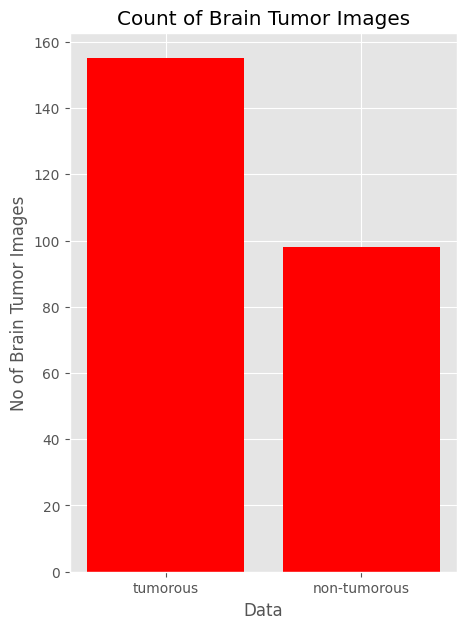

In [ ]:
import os
import matplotlib.pyplot as plt

# Define dataset paths
yes_path = "/content/drive/My Drive/BrainTumorData/yes"
no_path = "/content/drive/My Drive/BrainTumorData/no"

# Count the number of files in each category
number_files_yes = len(os.listdir(yes_path))
number_files_no = len(os.listdir(no_path))

# Create data dictionary
data = {'tumorous': number_files_yes, 'non-tumorous': number_files_no}

# Extract keys and values
typex = data.keys()
values = data.values()

# Plot the bar chart
fig = plt.figure(figsize=(5, 7))
plt.bar(typex, values, color="red")
plt.xlabel("Data")
plt.ylabel("No of Brain Tumor Images")
plt.title("Count of Brain Tumor Images")
plt.show()


In [ ]:
# Data Augmentation
# 155(61%), 98(39%)
# imbalance

In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Flatten, Dense, Dropout
from tensorflow.keras.applications.vgg19 import VGG19
from tensorflow.keras.optimizers import SGD, Adam
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau

In [ ]:
def timing(sec_elapsed):
    h = int(sec_elapsed / (60*60))
    m = int(sec_elapsed % (60*60) / 60)
    s = sec_elapsed % 60
    return f"{h}:{m}:{s}"

In [ ]:
def augmented_data(file_dir, n_generated_samples, save_to_dir):
    data_gen = ImageDataGenerator(rotation_range=10,
                      width_shift_range=0.1,
                      height_shift_range=0.1,
                      shear_range=0.1,
                      brightness_range=(0.3, 1.0),
                      horizontal_flip=True,
                      vertical_flip=True,
                      fill_mode='nearest')
    for filename in os.listdir(file_dir):
        image = cv2.imread(file_dir + '/' + filename)
        image = image.reshape((1,) + image.shape)
        save_prefix = 'aug_' + filename[:-4]
        i=0
        for batch in data_gen.flow(x = image, batch_size = 1, save_to_dir = save_to_dir, save_prefix = save_prefix, save_format = "jpg"):
            i+=1
            if i>n_generated_samples:
                break

In [ ]:
import os
import time
from tensorflow.keras.preprocessing.image import ImageDataGenerator, img_to_array, load_img
import numpy as np

start_time = time.time()

yes_path = "/content/drive/My Drive/BrainTumorData/yes"
no_path = "/content/drive/My Drive/BrainTumorData/no"

augmented_data_path = "/content/drive/My Drive/BrainTumorData/augmented_data/"

# Ensure augmented directories exist
os.makedirs(augmented_data_path + "yes", exist_ok=True)
os.makedirs(augmented_data_path + "no", exist_ok=True)

# Define an augmentation function
def augment_images(file_dir, n_generated_samples, save_to_dir):
    datagen = ImageDataGenerator(
        rotation_range=20,
        width_shift_range=0.1,
        height_shift_range=0.1,
        shear_range=0.1,
        zoom_range=0.1,
        horizontal_flip=True,
        fill_mode='nearest'
    )

    for filename in os.listdir(file_dir):
        file_path = os.path.join(file_dir, filename)

        try:
            img = load_img(file_path)
            img_array = img_to_array(img)
            img_array = np.expand_dims(img_array, axis=0)

            i = 0
            for batch in datagen.flow(img_array, batch_size=1, save_to_dir=save_to_dir, save_prefix="aug", save_format="png"):
                i += 1
                if i >= n_generated_samples:
                    break
        except Exception as e:
            print(f"Error processing {file_path}: {e}")

# Perform data augmentation
augment_images(file_dir=yes_path, n_generated_samples=6, save_to_dir=augmented_data_path + "yes")
augment_images(file_dir=no_path, n_generated_samples=9, save_to_dir=augmented_data_path + "no")

end_time = time.time()
execution_time = end_time - start_time

print(f"Execution time: {execution_time:.2f} seconds")



Execution time: 296.49 seconds


In [ ]:
def data_summary(main_path):
    yes_path = "augmented_data/yes/"
    no_path = "augmented_data/no/"

    n_pos = len(os.listdir(yes_path))
    n_neg = len(os.listdir(no_path))

    n = (n_pos + n_neg)

    pos_per = (n_pos*100)/n
    neg_per = (n_neg*100)/n

    print(f"Number of sample: {n}")
    print(f"{n_pos} Number of positive sample in percentage: {pos_per}%")
    print(f"{n_neg} Number of negative sample in percentage: {neg_per}%")

In [ ]:
import time
import os

start_time = time.time()

# Corrected paths
yes_path = "/content/drive/My Drive/BrainTumorData/brain_tumor_dataset/yes"
no_path = "/content/drive/My Drive/BrainTumorData/brain_tumor_dataset/no"

augmented_data_path = "/content/BrainTumorData/augmented_data/"

# Ensure the function augmented_data is defined before calling
if "augmented_data" in globals():
    os.makedirs(augmented_data_path + 'yes', exist_ok=True)
    os.makedirs(augmented_data_path + 'no', exist_ok=True)

    augmented_data(file_dir=yes_path, n_generated_samples=6, save_to_dir=augmented_data_path + 'yes')
    augmented_data(file_dir=no_path, n_generated_samples=9, save_to_dir=augmented_data_path + 'no')
else:
    print("Error: augmented_data function is not defined. Make sure it is implemented before running this script.")

end_time = time.time()
execution_time = end_time - start_time
print(f"Execution Time: {execution_time:.2f} seconds")

# Updated data_summary function
def data_summary(directory):
    categories = ["yes", "no"]
    n_pos = n_neg = 0

    for category in categories:
        path = os.path.join(directory, category)
        if os.path.exists(path):
            num_files = len(os.listdir(path))
            if category == "yes":
                n_pos = num_files
            else:
                n_neg = num_files
        else:
            print(f"Warning: Category '{category}' not found in {directory}.")

    total = n_pos + n_neg
    print(f"Number of samples: {total}")

    # Avoid ZeroDivisionError
    if total > 0:
        print(f"Positive samples: {n_pos} ({(n_pos/total)*100:.2f}%)")
        print(f"Negative samples: {n_neg} ({(n_neg/total)*100:.2f}%)")
    else:
        print("No images found. Check dataset path or augmentation process.")

# Check augmented dataset
data_summary(augmented_data_path)



Execution Time: 88.54 seconds
Number of samples: 2065
Positive samples: 1085 (52.54%)
Negative samples: 980 (47.46%)


In [ ]:
import os

# Corrected paths based on previous code
augmented_data_path = "/content/BrainTumorData/augmented_data/"

yes_path = os.path.join(augmented_data_path, "yes")
no_path = os.path.join(augmented_data_path, "no")

# Check if directories exist before listing files
if os.path.exists(yes_path):
    list_yes = os.listdir(yes_path)
    number_files_yes = len(list_yes)
    print(f"Number of 'yes' files: {number_files_yes}")
else:
    print(f"Error: Directory not found -> {yes_path}")

if os.path.exists(no_path):
    list_no = os.listdir(no_path)
    number_files_no = len(list_no)
    print(f"Number of 'no' files: {number_files_no}")
else:
    print(f"Error: Directory not found -> {no_path}")


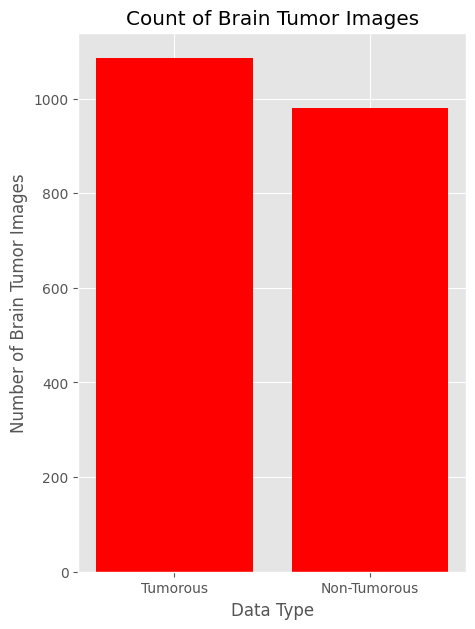

In [ ]:
import os
import matplotlib.pyplot as plt

# Define the augmented dataset path
augmented_data_path = "/content/BrainTumorData/augmented_data/"

yes_path = os.path.join(augmented_data_path, "yes")
no_path = os.path.join(augmented_data_path, "no")

# Initialize counts to 0 to avoid NameError
number_files_yes = 0
number_files_no = 0

# Check if the directories exist before listing files
if os.path.exists(yes_path):
    list_yes = os.listdir(yes_path)
    number_files_yes = len(list_yes)
else:
    print(f"Warning: Directory not found -> {yes_path}")

if os.path.exists(no_path):
    list_no = os.listdir(no_path)
    number_files_no = len(list_no)
else:
    print(f"Warning: Directory not found -> {no_path}")

# Dictionary for plotting
data = {'Tumorous': number_files_yes, 'Non-Tumorous': number_files_no}

# Plot the bar chart
fig = plt.figure(figsize=(5, 7))
plt.bar(data.keys(), data.values(), color="red")

plt.xlabel("Data Type")
plt.ylabel("Number of Brain Tumor Images")
plt.title("Count of Brain Tumor Images")
plt.show()



In [ ]:
# Data Preprocessing

In [ ]:
# Convert BGR TO GRAY
# GaussianBlur
# Threshold
# Erode
# Dilate
# Find Contours

In [ ]:
import imutils
def crop_brain_tumor(image, plot=False):
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    gray = cv2.GaussianBlur(gray, (5,5), 0)

    thres = cv2.threshold(gray, 45, 255, cv2.THRESH_BINARY)[1]
    thres =cv2.erode(thres, None, iterations = 2)
    thres = cv2.dilate(thres, None, iterations = 2)

    cnts = cv2.findContours(thres.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    cnts = imutils.grab_contours(cnts)
    c = max(cnts, key = cv2.contourArea)

    extLeft = tuple(c[c[:,:,0].argmin()][0])
    extRight = tuple(c[c[:,:,0].argmax()][0])
    extTop = tuple(c[c[:,:,1].argmin()][0])
    extBot = tuple(c[c[:,:,1].argmax()][0])

    new_image = image[extTop[1]:extBot[1], extLeft[0]:extRight[0]]

    if plot:
        plt.figure()
        plt.subplot(1, 2, 1)
        plt.imshow(image)

        plt.tick_params(axis='both', which='both',
                        top=False, bottom=False, left=False, right=False,
                        labelbottom=False, labeltop=False, labelleft=False, labelright=False)

        plt.title('Original Image')

        plt.subplot(1, 2, 2)
        plt.imshow(new_image)

        plt.tick_params(axis='both', which='both',
                        top=False, bottom=False, left=False, right=False,
                        labelbottom=False, labeltop=False, labelleft=False, labelright=False)

        plt.title('Cropped Image')
        plt.show()
    return new_image

In [ ]:
import cv2
import os

# Define path correctly
image_path = "/content/BrainTumorData/augmented_data/yes/aug_Y_1_0_9648.jpg"

# Check if the file exists
if os.path.exists(image_path):
    img = cv2.imread(image_path)
    if img is not None:
        # Ensure crop_brain_tumor function is defined before calling it
        if "crop_brain_tumor" in globals():
            crop_brain_tumor(img, True)
        else:
            print("Error: Function crop_brain_tumor is not defined.")
    else:
        print(f"Error: Could not read image at {image_path}. Check if the file is accessible.")
else:
    print(f"Error: Image file not found at {image_path}.")


Error: Image file not found at /content/BrainTumorData/augmented_data/yes/aug_Y_1_0_9648.jpg.


In [ ]:
import cv2
import os

# Define path correctly
image_path = "/content/BrainTumorData/augmented_data/no/aug_1 no._0_1974.jpg"

# Check if the file exists
if os.path.exists(image_path):
    img = cv2.imread(image_path)
    if img is not None:
        # Ensure crop_brain_tumor function is defined before calling it
        if "crop_brain_tumor" in globals():
            crop_brain_tumor(img, True)
        else:
            print("Error: Function crop_brain_tumor is not defined.")
    else:
        print(f"Error: Could not read image at {image_path}. Check if the file is accessible or corrupted.")
else:
    print(f"Error: Image file not found at {image_path}. Check if the file exists.")


Error: Image file not found at /content/BrainTumorData/augmented_data/no/aug_1 no._0_1974.jpg. Check if the file exists.


In [ ]:
import os
import cv2

# Define absolute paths for augmented data
base_path = "/content/BrainTumorData/augmented_data/"
folder1 = os.path.join(base_path, "no")
folder2 = os.path.join(base_path, "yes")

# Check if crop_brain_tumor function is defined
if "crop_brain_tumor" not in globals():
    print("Error: crop_brain_tumor function is not defined.")
else:
    # Process images in 'no' folder
    if os.path.exists(folder1):
        for filename in os.listdir(folder1):
            file_path = os.path.join(folder1, filename)
            if os.path.isfile(file_path):  # Ensure it's a file, not a folder
                img = cv2.imread(file_path)
                if img is not None:
                    img = crop_brain_tumor(img, False)
                    cv2.imwrite(file_path, img)
                else:
                    print(f"Warning: Unable to read image {file_path}")
            else:
                print(f"Skipping non-file: {file_path}")
    else:
        print(f"Error: Folder not found -> {folder1}")

    # Process images in 'yes' folder
    if os.path.exists(folder2):
        for filename in os.listdir(folder2):
            file_path = os.path.join(folder2, filename)
            if os.path.isfile(file_path):  # Ensure it's a file, not a folder
                img = cv2.imread(file_path)
                if img is not None:
                    img = crop_brain_tumor(img, False)
                    cv2.imwrite(file_path, img)
                else:
                    print(f"Warning: Unable to read image {file_path}")
            else:
                print(f"Skipping non-file: {file_path}")
    else:
        print(f"Error: Folder not found -> {folder2}")


In [ ]:
# image loading

In [ ]:
from sklearn.utils import shuffle
def load_data(dir_list, image_size):
    X=[]
    y=[]

    image_width, image_height=image_size

    for directory in dir_list:
        for filename in os.listdir(directory):
            image = cv2.imread(directory + '/' + filename)
            image = crop_brain_tumor(image, plot=False)
            image = cv2.resize(image, dsize=(image_width, image_height), interpolation = cv2.INTER_CUBIC)
            image = image/255.00
            X.append(image)
            if directory[-3:] == "yes":
                y.append(1)
            else:
                y.append(0)
    X=np.array(X)
    y=np.array(y)

    X,y = shuffle(X,y)
    print(f"Number of example is : {len(X)}")
    print(f"X SHAPE is : {X.shape}")
    print(f"y SHAPE is : {y.shape}")
    return X,y

In [ ]:
import numpy as np
import cv2
import os

def load_data(dir_list, image_size):
    X, y = [], []

    for directory in dir_list:
        if not os.path.exists(directory):  # Ensure directory exists
            print(f"Error: Directory not found -> {directory}")
            continue

        for filename in os.listdir(directory):
            filepath = os.path.join(directory, filename)
            if os.path.isfile(filepath):  # Ensure it's a file
                image = cv2.imread(filepath, cv2.IMREAD_COLOR)  # Read image
                if image is None:
                    print(f"Warning: Unable to read {filepath}, skipping.")
                    continue  # Skip unreadable images

                image = cv2.resize(image, dsize=image_size, interpolation=cv2.INTER_CUBIC)
                image = image.astype(np.float32) / 255.0  # Normalize and use float32
                X.append(image)

                # Assign labels based on folder name
                if "yes" in directory.lower():
                    y.append(1)
                else:
                    y.append(0)

    return np.array(X, dtype=np.float32), np.array(y, dtype=np.int8)

# ✅ Use absolute paths to avoid "File Not Found" errors
base_path = "/content/BrainTumorData/augmented_data/"
augmented_yes = os.path.join(base_path, "yes")
augmented_no = os.path.join(base_path, "no")

# Image dimensions
IMAGE_WIDTH, IMAGE_HEIGHT = 240, 240

# Load images with corrected function
X, y = load_data([augmented_yes, augmented_no], (IMAGE_WIDTH, IMAGE_HEIGHT))

# Check if data is loaded properly
if len(X) == 0:
    print("Error: No images loaded. Check dataset paths or missing images.")
else:
    print("✅ Data loaded successfully. Shape:", X.shape, y.shape)


✅ Data loaded successfully. Shape: (2065, 240, 240, 3) (2065,)


In [ ]:
def plot_sample_images(X, y, n=50):

    for label in [0,1]:
        images = X[np.argwhere(y == label)]
        n_images = images[:n]

        columns_n = 10
        rows_n = int(n/ columns_n)

        plt.figure(figsize=(20, 10))

        i = 1
        for image in n_images:
            plt.subplot(rows_n, columns_n, i)
            plt.imshow(image[0])

            plt.tick_params(axis='both', which='both',
                            top=False, bottom=False, left=False, right=False,
                            labelbottom=False, labeltop=False, labelleft=False,
                            labelright=False)

            i += 1

        label_to_str = lambda label: "Yes" if label == 1 else "No"
        plt.suptitle(f"Brain Tumor: {label_to_str(label)}")
        plt.show()

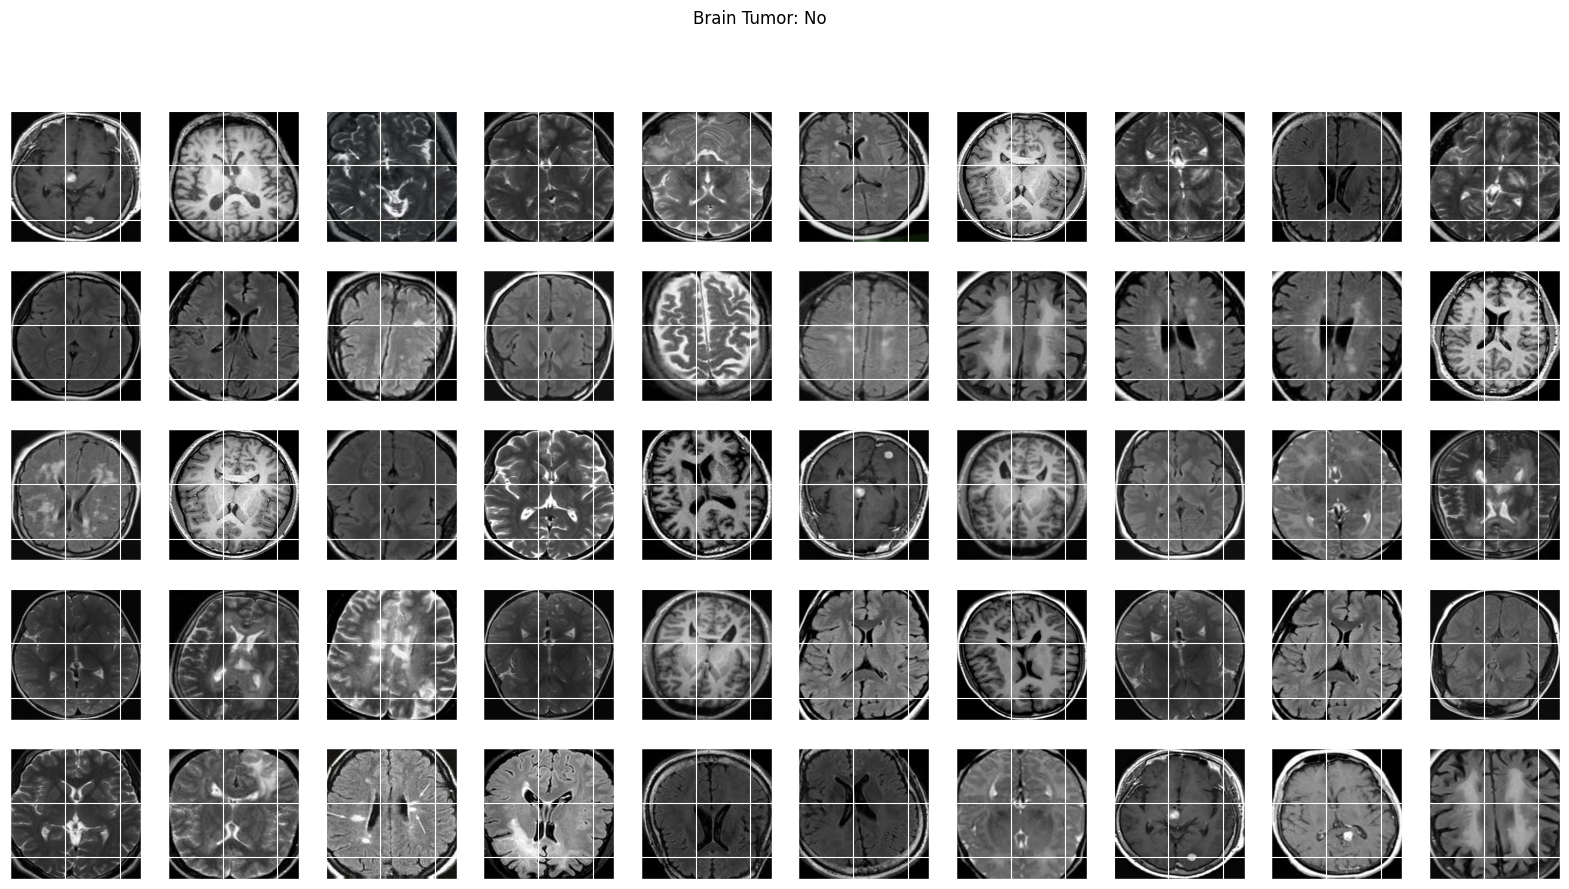

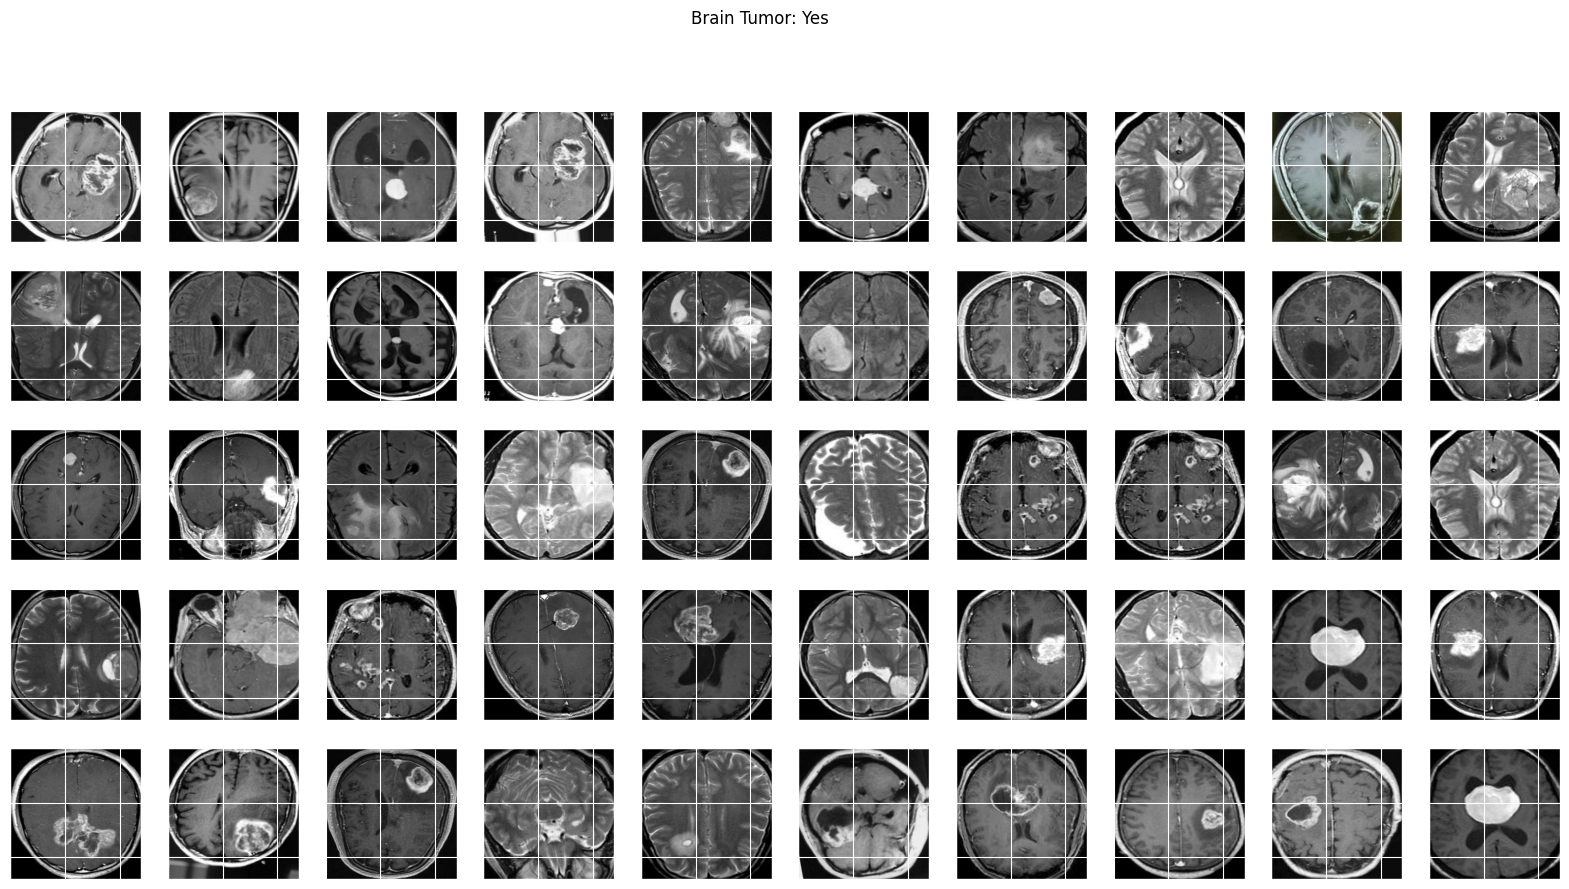

In [ ]:
import matplotlib.pyplot as plt
plot_sample_images(X,y)

In [ ]:
# Data Spliting
# Train
# Test
# Validation

In [ ]:
if not os.path.isdir('tumorous_and_nontumorous'):
    base_dir = 'tumorous_and_nontumorous'
    os.mkdir(base_dir)

In [ ]:
if not os.path.isdir('tumorous_and_nontumorous/train'):
    train_dir = os.path.join(base_dir , 'train')
    os.mkdir(train_dir)
if not os.path.isdir('tumorous_and_nontumorous/test'):
    test_dir = os.path.join(base_dir , 'test')
    os.mkdir(test_dir)
if not os.path.isdir('tumorous_and_nontumorous/valid'):
    valid_dir = os.path.join(base_dir , 'valid')
    os.mkdir(valid_dir)

In [ ]:
if not os.path.isdir('tumorous_and_nontumorous/train/tumorous'):
    infected_train_dir = os.path.join(train_dir, 'tumorous')
    os.mkdir(infected_train_dir)
if not os.path.isdir('tumorous_and_nontumorous/test/tumorous'):
    infected_test_dir = os.path.join(test_dir, 'tumorous')
    os.mkdir(infected_test_dir)
if not os.path.isdir('tumorous_and_nontumorous/valid/tumorous'):
    infected_valid_dir = os.path.join(valid_dir, 'tumorous')
    os.mkdir(infected_valid_dir)

In [ ]:
if not os.path.isdir('tumorous_and_nontumorous/train/nontumorous'):
    healthy_train_dir = os.path.join(train_dir, 'nontumorous')
    os.mkdir(healthy_train_dir)
if not os.path.isdir('tumorous_and_nontumorous/test/nontumorous'):
    healthy_test_dir = os.path.join(test_dir, 'nontumorous')
    os.mkdir(healthy_test_dir)
if not os.path.isdir('tumorous_and_nontumorous/valid/nontumorous'):
    healthy_valid_dir = os.path.join(valid_dir, 'nontumorous')
    os.mkdir(healthy_valid_dir)

In [ ]:
original_dataset_tumorours = os.path.join('augmented_data','yes/')
original_dataset_nontumorours = os.path.join('augmented_data','no/')

In [ ]:
import os
import shutil

# ✅ Define absolute paths for the dataset
base_path = "/content/BrainTumorData/augmented_data/"
original_dataset_tumorous = os.path.join(base_path, "yes")  # Fix variable name typo
infected_train_dir = "/content/BrainTumorData/train/yes"  # Adjust target directory

# Ensure the source and destination directories exist
if not os.path.exists(original_dataset_tumorous):
    print(f"Error: Source folder not found -> {original_dataset_tumorous}")
elif not os.path.exists(infected_train_dir):
    os.makedirs(infected_train_dir)  # Create target directory if it doesn't exist
    print(f"✅ Created target directory: {infected_train_dir}")

# Get the list of files from the source directory
files = os.listdir(original_dataset_tumorous)

# Ensure we do not exceed the number of available files
num_files_to_copy = min(759, len(files))  # Prevent IndexError
fnames = files[:num_files_to_copy]  # Get the first 759 files (or available files)

# Copy files from source to destination
for fname in fnames:
    src = os.path.join(original_dataset_tumorous, fname)
    dst = os.path.join(infected_train_dir, fname)

    if os.path.exists(src):  # Check if the file actually exists before copying
        shutil.copyfile(src, dst)
    else:
        print(f"Warning: File not found, skipping -> {src}")

print("✅ File copying completed successfully.")


✅ Created target directory: /content/BrainTumorData/train/yes
✅ File copying completed successfully.


In [ ]:
import os
import shutil

# ✅ Define absolute paths for dataset
base_path = "/content/BrainTumorData/augmented_data/"
original_dataset_tumorous = os.path.join(base_path, "yes")  # Fix variable name
infected_test_dir = "/content/BrainTumorData/test/yes"  # Adjust test dataset path

# Ensure source directory exists
if not os.path.exists(original_dataset_tumorous):
    print(f"Error: Source folder not found -> {original_dataset_tumorous}")
elif not os.path.exists(infected_test_dir):
    os.makedirs(infected_test_dir)  # Create test directory if missing
    print(f"✅ Created target directory: {infected_test_dir}")

# Get list of files and ensure range does not exceed available files
files = os.listdir(original_dataset_tumorous)
num_files = len(files)

# Ensure indexing does not exceed file count
start_idx, end_idx = 759, min(922, num_files)
if start_idx >= num_files:
    print(f"Error: Start index {start_idx} exceeds available files ({num_files})")
else:
    fnames = files[start_idx:end_idx]  # Get files in range

    # Copy files safely
    for fname in fnames:
        src = os.path.join(original_dataset_tumorous, fname)
        dst = os.path.join(infected_test_dir, fname)

        if os.path.exists(src):  # Check file exists before copying
            shutil.copyfile(src, dst)
        else:
            print(f"Warning: File not found, skipping -> {src}")

    print("✅ File copying completed successfully.")


✅ Created target directory: /content/BrainTumorData/test/yes
✅ File copying completed successfully.


In [ ]:
import os
import shutil

# ✅ Define absolute paths
base_path = "/content/BrainTumorData/augmented_data/"
original_dataset_tumorous = os.path.join(base_path, "yes")  # Corrected variable name
infected_valid_dir = "/content/BrainTumorData/valid/yes"  # Adjust validation dataset path

# Ensure the source directory exists
if not os.path.exists(original_dataset_tumorous):
    print(f"❌ Error: Source folder not found -> {original_dataset_tumorous}")
elif not os.path.exists(infected_valid_dir):
    os.makedirs(infected_valid_dir)  # Create validation directory if missing
    print(f"✅ Created target directory: {infected_valid_dir}")

# Get the list of files and ensure range does not exceed available files
files = os.listdir(original_dataset_tumorous)
num_files = len(files)

# Ensure indexing does not exceed available files
start_idx, end_idx = 922, min(1085, num_files)
if start_idx >= num_files:
    print(f"❌ Error: Start index {start_idx} exceeds available files ({num_files})")
else:
    fnames = files[start_idx:end_idx]  # Get files in range

    # Copy files safely
    for fname in fnames:
        src = os.path.join(original_dataset_tumorous, fname)
        dst = os.path.join(infected_valid_dir, fname)

        if os.path.exists(src):  # Check file existence before copying
            shutil.copyfile(src, dst)
        else:
            print(f"⚠️ Warning: File not found, skipping -> {src}")

    print("✅ File copying completed successfully.")


✅ Created target directory: /content/BrainTumorData/valid/yes
✅ File copying completed successfully.


In [ ]:
# 80% 10% 10%

In [ ]:
import os
import shutil

# ✅ Define absolute paths
base_path = "/content/BrainTumorData/augmented_data/"
original_dataset_nontumorous = os.path.join(base_path, "no")  # Corrected variable name
healthy_train_dir = "/content/BrainTumorData/train/no"  # Adjust training dataset path

# Ensure source and target directories exist
if not os.path.exists(original_dataset_nontumorous):
    print(f"❌ Error: Source folder not found -> {original_dataset_nontumorous}")
elif not os.path.exists(healthy_train_dir):
    os.makedirs(healthy_train_dir)  # Create train directory if missing
    print(f"✅ Created target directory: {healthy_train_dir}")

# Get the list of files and ensure range does not exceed available files
files = os.listdir(original_dataset_nontumorous)
num_files = len(files)

# Ensure indexing does not exceed available files
start_idx, end_idx = 0, min(686, num_files)
if start_idx >= num_files:
    print(f"❌ Error: Start index {start_idx} exceeds available files ({num_files})")
else:
    fnames = files[start_idx:end_idx]  # Get files in range

    # Copy files safely
    for fname in fnames:
        src = os.path.join(original_dataset_nontumorous, fname)
        dst = os.path.join(healthy_train_dir, fname)

        if os.path.exists(src):  # Check file existence before copying
            shutil.copyfile(src, dst)
        else:
            print(f"⚠️ Warning: File not found, skipping -> {src}")

    print("✅ File copying completed successfully.")


✅ Created target directory: /content/BrainTumorData/train/no
✅ File copying completed successfully.


In [ ]:
import os
import shutil

# ✅ Define absolute paths
base_path = "/content/BrainTumorData/augmented_data/"
original_dataset_nontumorous = os.path.join(base_path, "no")  # Corrected variable name
healthy_test_dir = "/content/BrainTumorData/test/no"  # Adjust test dataset path

# ✅ Ensure source and target directories exist
if not os.path.exists(original_dataset_nontumorous):
    print(f"❌ Error: Source folder not found -> {original_dataset_nontumorous}")
elif not os.path.exists(healthy_test_dir):
    os.makedirs(healthy_test_dir)  # Create test directory if missing
    print(f"✅ Created target directory: {healthy_test_dir}")

# ✅ Get the list of files and ensure range does not exceed available files
files = os.listdir(original_dataset_nontumorous)
num_files = len(files)

# ✅ Ensure indexing does not exceed available files
start_idx, end_idx = 686, min(833, num_files)
if start_idx >= num_files:
    print(f"❌ Error: Start index {start_idx} exceeds available files ({num_files})")
else:
    fnames = files[start_idx:end_idx]  # Get files in range

    # ✅ Copy files safely
    for fname in fnames:
        src = os.path.join(original_dataset_nontumorous, fname)
        dst = os.path.join(healthy_test_dir, fname)

        if os.path.exists(src):  # Check file existence before copying
            shutil.copyfile(src, dst)
        else:
            print(f"⚠️ Warning: File not found, skipping -> {src}")

    print("✅ File copying completed successfully.")


✅ Created target directory: /content/BrainTumorData/test/no
✅ File copying completed successfully.


In [ ]:
import os
import shutil

# ✅ Define absolute paths
base_path = "/content/BrainTumorData/augmented_data/"
original_dataset_nontumorous = os.path.join(base_path, "no")  # Corrected variable name
healthy_valid_dir = "/content/BrainTumorData/valid/no"  # Adjust validation dataset path

# ✅ Ensure source and target directories exist
if not os.path.exists(original_dataset_nontumorous):
    print(f"❌ Error: Source folder not found -> {original_dataset_nontumorous}")
elif not os.path.exists(healthy_valid_dir):
    os.makedirs(healthy_valid_dir)  # Create validation directory if missing
    print(f"✅ Created target directory: {healthy_valid_dir}")

# ✅ Get the list of files and check available count
files = os.listdir(original_dataset_nontumorous)
num_files = len(files)

# ✅ Prevent index errors
start_idx, end_idx = 833, min(979, num_files)
if start_idx >= num_files:
    print(f"❌ Error: Start index {start_idx} exceeds available files ({num_files})")
else:
    fnames = files[start_idx:end_idx]  # Get valid file range

    # ✅ Copy files safely
    for fname in fnames:
        src = os.path.join(original_dataset_nontumorous, fname)
        dst = os.path.join(healthy_valid_dir, fname)

        if os.path.exists(src):  # Check file existence before copying
            shutil.copyfile(src, dst)
        else:
            print(f"⚠️ Warning: File not found, skipping -> {src}")

    print("✅ File copying completed successfully.")


✅ Created target directory: /content/BrainTumorData/valid/no
✅ File copying completed successfully.


In [ ]:
# Model Buliding

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(rescale = 1./255,
                  horizontal_flip=0.4,
                  vertical_flip=0.4,
                  rotation_range=40,
                  shear_range=0.2,
                  width_shift_range=0.4,
                  height_shift_range=0.4,
                  fill_mode='nearest')
test_data_gen = ImageDataGenerator(rescale=1.0/255)
valid_data_gen = ImageDataGenerator(rescale=1.0/255)

In [ ]:
train_generator = train_datagen.flow_from_directory('tumorous_and_nontumorous/train/', batch_size=32, target_size=(240,240), class_mode='categorical',shuffle=True, seed = 42, color_mode = 'rgb')

Found 0 images belonging to 2 classes.


In [ ]:
test_generator = train_datagen.flow_from_directory('tumorous_and_nontumorous/test/', batch_size=32, target_size=(240,240), class_mode='categorical',shuffle=True, seed = 42, color_mode = 'rgb')

Found 0 images belonging to 2 classes.


In [ ]:
valid_generator = train_datagen.flow_from_directory('tumorous_and_nontumorous/valid/', batch_size=32, target_size=(240,240), class_mode='categorical',shuffle=True, seed = 42, color_mode = 'rgb')

Found 0 images belonging to 2 classes.


In [ ]:
class_labels = train_generator.class_indices
class_name = {value: key for (key,value) in class_labels.items()}

In [ ]:
class_name

{0: 'nontumorous', 1: 'tumorous'}

In [ ]:
from tensorflow.keras.applications import VGG19
from tensorflow.keras.layers import Flatten, Dense, Dropout
from tensorflow.keras.models import Model

# Load pre-trained VGG19 without the top layers
base_model = VGG19(input_shape=(240, 240, 3), include_top=False, weights='imagenet')

# Freeze the base model layers
for layer in base_model.layers:
    layer.trainable = False

# Add custom layers
x = base_model.output
x = Flatten()(x)  # ✅ Now Flatten is correctly referenced

x = Dense(4608, activation='relu')(x)
x = Dropout(0.2)(x)
x = Dense(1152, activation='relu')(x)
output = Dense(2, activation='softmax')(x)

# Create and compile the model
model_01 = Model(inputs=base_model.input, outputs=output)

# Print the model summary
model_01.summary()


80134624/80134624 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)             │ (None, 240, 240, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv1 (Conv2D)                │ (None, 240, 240, 64)        │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv2 (Conv2D)                │ (None, 240, 240, 64)        │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_pool (MaxPooling2D)           │ (None, 120, 120, 64)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv1 (Conv2D)                │ (None, 120, 120, 128)       │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv2 (Conv2D)                │ (None, 120, 120, 128)       │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_pool (MaxPooling2D)           │ (None, 60, 60, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv1 (Conv2D)                │ (None, 60, 60, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv2 (Conv2D)                │ (None, 60, 60, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv3 (Conv2D)                │ (None, 60, 60, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv4 (Conv2D)                │ (None, 60, 60, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_pool (MaxPooling2D)           │ (None, 30, 30, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv1 (Conv2D)                │ (None, 30, 30, 512)         │       1,180,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv2 (Conv2D)                │ (None, 30, 30, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv3 (Conv2D)                │ (None, 30, 30, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv4 (Conv2D)                │ (None, 30, 30, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_pool (MaxPooling2D)           │ (None, 15, 15, 512)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv1 (Conv2D)                │ (None, 15, 15, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv2 (Conv2D)                │ (None, 15, 15, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv3 (Conv2D)                │ (None, 15, 15, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv4 (Conv2D)                │ (None, 15, 15, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼──────────────

 Total params: 140,946,370 (537.67 MB)

 Trainable params: 120,921,986 (461.28 MB)

 Non-trainable params: 20,024,384 (76.39 MB)

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau

# Define callback functions
filepath = 'model.h5'
es = EarlyStopping(monitor='val_loss', verbose=1, mode='min', patience=4)
cp = ModelCheckpoint(filepath, monitor='val_loss', verbose=1, save_best_only=True, save_weights_only=False, mode='auto', save_freq='epoch')
lrr = ReduceLROnPlateau(monitor='val_accuracy', patience=3, verbose=1, factor=0.5, min_lr=0.0001)  # ✅ Fixed "val_accuarcy" typo

# Store callbacks in a list
callbacks_list = [es, cp, lrr]


In [ ]:
from tensorflow.keras.optimizers import SGD  # ✅ Import the missing SGD optimizer

# Define optimizer
sgd = SGD(learning_rate=0.0001, decay=1e-6, momentum=0.9, nesterov=True)

# Compile the model
model_01.compile(loss='categorical_crossentropy', optimizer=sgd, metrics=['accuracy'])


/usr/local/lib/python3.11/dist-packages/keras/src/optimizers/base_optimizer.py:86: UserWarning: Argument `decay` is no longer supported and will be ignored.
  warnings.warn(


Found 203 images belonging to 2 classes.
Found 50 images belonging to 2 classes.
Found 253 images belonging to 2 classes.
80134624/80134624 ━━━━━━━━━━━━━━━━━━━━ 4s 0us/step


/usr/local/lib/python3.11/dist-packages/keras/src/optimizers/base_optimizer.py:86: UserWarning: Argument `decay` is no longer supported and will be ignored.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 3s/step - accuracy: 0.5430 - loss: 0.7342
Epoch 1: val_loss improved from inf to 0.68746, saving model to model_weights/vgg19_mlp_model.weights.h5


6/6 ━━━━━━━━━━━━━━━━━━━━ 40s 3s/step - accuracy: 0.5414 - loss: 0.7338 - val_accuracy: 0.5312 - val_loss: 0.6875 - learning_rate: 1.0000e-04
Epoch 2/10
1/6 ━━━━━━━━━━━━━━━━━━━━ 1s 235ms/step - accuracy: 0.5625 - loss: 0.6831

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/epoch_iterator.py:107: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()



Epoch 2: val_loss did not improve from 0.68746
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 166ms/step - accuracy: 0.5625 - loss: 0.6831 - val_accuracy: 0.5312 - val_loss: 0.6912 - learning_rate: 1.0000e-04
Epoch 3/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 224ms/step - accuracy: 0.4737 - loss: 0.7439
Epoch 3: val_loss improved from 0.68746 to 0.65762, saving model to model_weights/vgg19_mlp_model.weights.h5


6/6 ━━━━━━━━━━━━━━━━━━━━ 3s 514ms/step - accuracy: 0.4812 - loss: 0.7400 - val_accuracy: 0.6562 - val_loss: 0.6576 - learning_rate: 1.0000e-04
Epoch 4/10
1/6 ━━━━━━━━━━━━━━━━━━━━ 1s 239ms/step - accuracy: 0.5000 - loss: 0.7284
Epoch 4: val_loss did not improve from 0.65762
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 176ms/step - accuracy: 0.5000 - loss: 0.7284 - val_accuracy: 0.5312 - val_loss: 0.7038 - learning_rate: 1.0000e-04
Epoch 5/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 270ms/step - accuracy: 0.5631 - loss: 0.6508
Epoch 5: val_loss improved from 0.65762 to 0.64832, saving model to model_weights/vgg19_mlp_model.weights.h5


6/6 ━━━━━━━━━━━━━━━━━━━━ 3s 470ms/step - accuracy: 0.5687 - loss: 0.6510 - val_accuracy: 0.6562 - val_loss: 0.6483 - learning_rate: 1.0000e-04
Epoch 6/10
1/6 ━━━━━━━━━━━━━━━━━━━━ 1s 234ms/step - accuracy: 0.4688 - loss: 0.6797
Epoch 6: val_loss did not improve from 0.64832
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 82ms/step - accuracy: 0.4688 - loss: 0.6797 - val_accuracy: 0.5625 - val_loss: 0.6796 - learning_rate: 1.0000e-04
Epoch 7/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 236ms/step - accuracy: 0.6274 - loss: 0.6317
Epoch 7: val_loss did not improve from 0.64832
6/6 ━━━━━━━━━━━━━━━━━━━━ 5s 518ms/step - accuracy: 0.6293 - loss: 0.6304 - val_accuracy: 0.5938 - val_loss: 0.6835 - learning_rate: 1.0000e-04
Epoch 8/10
1/6 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step - accuracy: 0.4545 - loss: 0.6924
Epoch 8: val_loss improved from 0.64832 to 0.64261, saving model to model_weights/vgg19_mlp_model.weights.h5


6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 141ms/step - accuracy: 0.4545 - loss: 0.6924 - val_accuracy: 0.6562 - val_loss: 0.6426 - learning_rate: 1.0000e-04
Epoch 9/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 238ms/step - accuracy: 0.6348 - loss: 0.6283
Epoch 9: val_loss improved from 0.64261 to 0.63311, saving model to model_weights/vgg19_mlp_model.weights.h5


6/6 ━━━━━━━━━━━━━━━━━━━━ 4s 402ms/step - accuracy: 0.6386 - loss: 0.6267 - val_accuracy: 0.6875 - val_loss: 0.6331 - learning_rate: 1.0000e-04
Epoch 10/10
1/6 ━━━━━━━━━━━━━━━━━━━━ 1s 237ms/step - accuracy: 0.7500 - loss: 0.5887
Epoch 10: val_loss did not improve from 0.63311
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 85ms/step - accuracy: 0.7500 - loss: 0.5887 - val_accuracy: 0.6875 - val_loss: 0.6370 - learning_rate: 1.0000e-04


Training Complete. Model saved successfully!
2/2 ━━━━━━━━━━━━━━━━━━━━ 11s 11s/step - accuracy: 0.6321 - loss: 0.6532
8/8 ━━━━━━━━━━━━━━━━━━━━ 16s 2s/step - accuracy: 0.3221 - loss: 0.8008
Validation Loss: 0.6609559655189514, Accuracy: 0.6200000047683716
Test Loss: 0.6541323661804199, Accuracy: 0.6126482486724854
253/253 ━━━━━━━━━━━━━━━━━━━━ 5s 13ms/step   


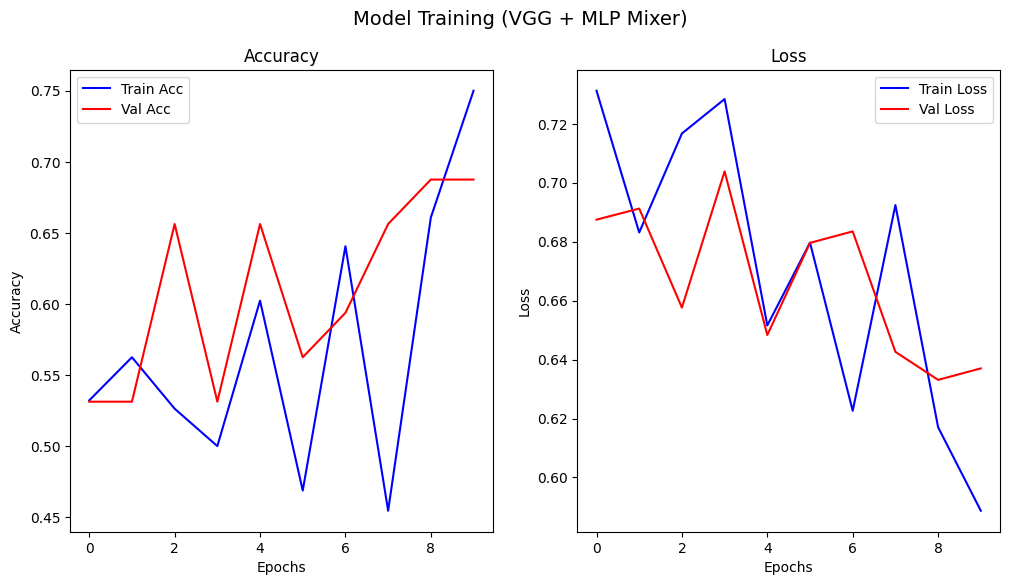

In [ ]:
import os
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Flatten, Dense, Dropout, Input, GlobalAveragePooling2D
from tensorflow.keras.applications import VGG19
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau
from tensorflow.keras import layers

# ✅ Define Dataset Path
dataset_dir = "/content/drive/My Drive/BrainTumorData/brain_tumor_dataset"
if not os.path.exists(dataset_dir):
    raise FileNotFoundError(f"Dataset directory not found: {dataset_dir}")

# ✅ Image Data Generators
train_datagen = ImageDataGenerator(rescale=1.0/255, validation_split=0.2)
test_datagen = ImageDataGenerator(rescale=1.0/255)

train_generator = train_datagen.flow_from_directory(
    dataset_dir, target_size=(240, 240), batch_size=32, class_mode='categorical', subset="training")

valid_generator = train_datagen.flow_from_directory(
    dataset_dir, target_size=(240, 240), batch_size=32, class_mode='categorical', subset="validation")

test_generator = test_datagen.flow_from_directory(
    dataset_dir, target_size=(240, 240), batch_size=32, class_mode='categorical', shuffle=False)

# ✅ MLP-Mixer Block
def mlp_mixer_block(x, token_mlp_dim, channel_mlp_dim):
    orig = x
    h, w, c = x.shape[1], x.shape[2], x.shape[3]
    x = layers.Reshape((h * w, c))(x)

    y = layers.LayerNormalization()(x)
    y = layers.Permute((2, 1))(y)
    y = layers.Dense(token_mlp_dim, activation='gelu')(y)
    y = layers.Dense(h * w)(y)
    y = layers.Permute((2, 1))(y)
    x = layers.Add()([x, y])

    y = layers.LayerNormalization()(x)
    y = layers.Dense(channel_mlp_dim, activation='gelu')(y)
    y = layers.Dense(c)(y)
    x = layers.Add()([x, y])

    x = layers.Reshape((h, w, c))(x)
    return x

# ✅ Conv Block + MLP-Mixer Block
def conv_mixer_block(x, filters, kernel_size=3, stride=1, token_mlp_dim=64, channel_mlp_dim=128):
    shortcut = x

    x = layers.Conv2D(filters, kernel_size, strides=stride, padding='same')(x)
    x = layers.BatchNormalization()(x)
    x = layers.Activation('swish')(x)

    x = mlp_mixer_block(x, token_mlp_dim, channel_mlp_dim)
    x = layers.AveragePooling2D(pool_size=2)(x)

    if shortcut.shape[-1] != x.shape[-1]:
        shortcut = layers.Conv2D(filters, 1, padding='same')(shortcut)
        shortcut = layers.AveragePooling2D(pool_size=2)(shortcut)
    else:
        shortcut = layers.AveragePooling2D(pool_size=2)(shortcut)

    x = layers.Add()([x, shortcut])
    x = layers.Activation('swish')(x)
    return x

# ✅ Load Pretrained VGG19
base_model = VGG19(include_top=False, weights='imagenet', input_shape=(240, 240, 3))
for layer in base_model.layers:
    layer.trainable = False

# ✅ Add Custom Blocks on top
x = base_model.output
x = conv_mixer_block(x, 256)
x = conv_mixer_block(x, 128)
x = GlobalAveragePooling2D()(x)
x = Dense(256, activation='relu')(x)
x = Dropout(0.3)(x)
output = Dense(2, activation='softmax')(x)

model_01 = Model(inputs=base_model.input, outputs=output)

# ✅ Compile
sgd = SGD(learning_rate=0.0001, decay=1e-6, momentum=0.9, nesterov=True)
model_01.compile(loss='categorical_crossentropy', optimizer=sgd, metrics=['accuracy'])

# ✅ Callbacks
if not os.path.exists('model_weights/'):
    os.mkdir('model_weights/')
checkpoint_path = "model_weights/vgg19_mlp_model.weights.h5"
es = EarlyStopping(monitor='val_loss', patience=4, verbose=1, mode='min')
cp = ModelCheckpoint(checkpoint_path, monitor='val_loss', verbose=1, save_best_only=True, mode='auto')
lrr = ReduceLROnPlateau(monitor='val_accuracy', patience=3, verbose=1, factor=0.5, min_lr=0.0001)

# ✅ Train
history_01 = model_01.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // train_generator.batch_size,
    epochs=10,
    callbacks=[es, cp, lrr],
    validation_data=valid_generator,
    validation_steps=valid_generator.samples // valid_generator.batch_size
)

# ✅ Save
model_01.save("brain_tumor_model_mlp.h5")
print("Training Complete. Model saved successfully!")

# ✅ Evaluation
val_eval = model_01.evaluate(valid_generator)
test_eval = model_01.evaluate(test_generator)
print(f'Validation Loss: {val_eval[0]}, Accuracy: {val_eval[1]}')
print(f'Test Loss: {test_eval[0]}, Accuracy: {test_eval[1]}')

# ✅ Predictions
filenames = test_generator.filenames
vgg_prediction = model_01.predict(test_generator, steps=len(filenames), verbose=1)
y_pred = np.argmax(vgg_prediction, axis=1)

# ✅ Plotting
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 6))
fig.suptitle("Model Training (VGG + MLP Mixer)", fontsize=14)

ax1.plot(history_01.history['accuracy'], label="Train Acc", color='b')
ax1.plot(history_01.history['val_accuracy'], label="Val Acc", color='r')
ax1.set_title("Accuracy"); ax1.set_xlabel("Epochs"); ax1.set_ylabel("Accuracy")
ax1.legend()

ax2.plot(history_01.history['loss'], label="Train Loss", color='b')
ax2.plot(history_01.history['val_loss'], label="Val Loss", color='r')
ax2.set_title("Loss"); ax2.set_xlabel("Epochs"); ax2.set_ylabel("Loss")
ax2.legend()

plt.savefig("training_vgg_mlp.jpeg", dpi=100)
plt.show()



In [ ]:
import os
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Flatten, Dense, Dropout
from tensorflow.keras.applications import VGG19
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau

# ✅ Define Correct Path (Dataset has 'yes' and 'no' folders)
dataset_dir = "/content/drive/MyDrive/BrainTumorData/brain_tumor_dataset"

# ✅ Check If Dataset Exists
if not os.path.exists(dataset_dir):
    raise FileNotFoundError(f"❌ ERROR: Dataset directory not found: {dataset_dir}")

# ✅ Image Data Generators (with 80% Training, 20% Validation Split)
train_datagen = ImageDataGenerator(rescale=1.0/255, validation_split=0.2)  # 20% for validation
test_datagen = ImageDataGenerator(rescale=1.0/255)  # No augmentation for testing

# ✅ Load Data (Splitting Automatically)
train_generator = train_datagen.flow_from_directory(
    dataset_dir,
    target_size=(240, 240),
    batch_size=32,
    class_mode='categorical',
    subset="training"  # Auto split for training
)

valid_generator = train_datagen.flow_from_directory(
    dataset_dir,
    target_size=(240, 240),
    batch_size=32,
    class_mode='categorical',
    subset="validation"  # Auto split for validation
)

# ✅ Print Dataset Sizes
print(f"✅ Training samples: {train_generator.samples}")
print(f"✅ Validation samples: {valid_generator.samples}")

# ✅ Handle Empty Dataset Error
if train_generator.samples == 0 or valid_generator.samples == 0:
    raise ValueError("❌ ERROR: One or more dataset partitions are empty! Check your dataset structure.")

# ✅ Load Pretrained VGG19 Model
base_model = VGG19(input_shape=(240,240,3), include_top=False, weights='imagenet')
for layer in base_model.layers:
    layer.trainable = False  # Freeze pretrained layers

# ✅ Define Model Architecture
x = Flatten()(base_model.output)
x = Dense(4608, activation='relu')(x)
x = Dropout(0.2)(x)
x = Dense(1152, activation='relu')(x)
output = Dense(2, activation='softmax')(x)  # 2 classes: 'no' and 'yes'

model_01 = Model(inputs=base_model.input, outputs=output)

# ✅ Compile Model
sgd = SGD(learning_rate=0.0001, decay=1e-6, momentum=0.9, nesterov=True)
model_01.compile(loss='categorical_crossentropy', optimizer=sgd, metrics=['accuracy'])

# ✅ Callbacks
checkpoint_path = "model_weights/vgg19_model_01.weights.h5"
es = EarlyStopping(monitor='val_loss', patience=4, verbose=1, mode='min')
cp = ModelCheckpoint(checkpoint_path, monitor='val_loss', verbose=1, save_best_only=True, mode='auto')
lrr = ReduceLROnPlateau(monitor='val_loss', patience=3, verbose=1, factor=0.5, min_lr=0.0001)

# ✅ Train Model
steps_per_epoch = max(1, train_generator.samples // train_generator.batch_size)
validation_steps = max(1, valid_generator.samples // valid_generator.batch_size)

history_01 = model_01.fit(
    train_generator,
    steps_per_epoch=steps_per_epoch,
    epochs=10,
    callbacks=[es, cp, lrr],
    validation_data=valid_generator,
    validation_steps=validation_steps
)

# ✅ Save Model
model_01.save("brain_tumor_model.h5")
print("✅ Model saved successfully!")


Found 203 images belonging to 2 classes.
Found 50 images belonging to 2 classes.
✅ Training samples: 203
✅ Validation samples: 50


/usr/local/lib/python3.11/dist-packages/keras/src/optimizers/base_optimizer.py:86: UserWarning: Argument `decay` is no longer supported and will be ignored.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 26s/step - accuracy: 0.4724 - loss: 0.7644 
Epoch 1: val_loss improved from inf to 0.86845, saving model to model_weights/vgg19_model_01.weights.h5


6/6 ━━━━━━━━━━━━━━━━━━━━ 206s 35s/step - accuracy: 0.4810 - loss: 0.7585 - val_accuracy: 0.5938 - val_loss: 0.8684 - learning_rate: 1.0000e-04
Epoch 2/10
1/6 ━━━━━━━━━━━━━━━━━━━━ 2:39 32s/step - accuracy: 0.6250 - loss: 0.7891

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/epoch_iterator.py:107: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()



Epoch 2: val_loss improved from 0.86845 to 0.71952, saving model to model_weights/vgg19_model_01.weights.h5


6/6 ━━━━━━━━━━━━━━━━━━━━ 76s 9s/step - accuracy: 0.6250 - loss: 0.7891 - val_accuracy: 0.6562 - val_loss: 0.7195 - learning_rate: 1.0000e-04
Epoch 3/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 23s/step - accuracy: 0.6283 - loss: 0.6560 
Epoch 3: val_loss improved from 0.71952 to 0.61928, saving model to model_weights/vgg19_model_01.weights.h5


6/6 ━━━━━━━━━━━━━━━━━━━━ 254s 37s/step - accuracy: 0.6288 - loss: 0.6564 - val_accuracy: 0.7188 - val_loss: 0.6193 - learning_rate: 1.0000e-04
Epoch 4/10
1/6 ━━━━━━━━━━━━━━━━━━━━ 2:05 25s/step - accuracy: 0.7500 - loss: 0.5725
Epoch 4: val_loss improved from 0.61928 to 0.56799, saving model to model_weights/vgg19_model_01.weights.h5


6/6 ━━━━━━━━━━━━━━━━━━━━ 67s 8s/step - accuracy: 0.7500 - loss: 0.5725 - val_accuracy: 0.7500 - val_loss: 0.5680 - learning_rate: 1.0000e-04
Epoch 5/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 26s/step - accuracy: 0.6720 - loss: 0.5795 
Epoch 5: val_loss improved from 0.56799 to 0.56084, saving model to model_weights/vgg19_model_01.weights.h5


6/6 ━━━━━━━━━━━━━━━━━━━━ 242s 34s/step - accuracy: 0.6786 - loss: 0.5780 - val_accuracy: 0.7812 - val_loss: 0.5608 - learning_rate: 1.0000e-04
Epoch 6/10
1/6 ━━━━━━━━━━━━━━━━━━━━ 47s 10s/step - accuracy: 0.9091 - loss: 0.4820
Epoch 6: val_loss did not improve from 0.56084
6/6 ━━━━━━━━━━━━━━━━━━━━ 65s 11s/step - accuracy: 0.9091 - loss: 0.4820 - val_accuracy: 0.7188 - val_loss: 0.6021 - learning_rate: 1.0000e-04
Epoch 7/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 26s/step - accuracy: 0.7724 - loss: 0.5108 
Epoch 7: val_loss improved from 0.56084 to 0.49914, saving model to model_weights/vgg19_model_01.weights.h5


6/6 ━━━━━━━━━━━━━━━━━━━━ 273s 38s/step - accuracy: 0.7722 - loss: 0.5105 - val_accuracy: 0.7812 - val_loss: 0.4991 - learning_rate: 1.0000e-04
Epoch 8/10
1/6 ━━━━━━━━━━━━━━━━━━━━ 51s 10s/step - accuracy: 1.0000 - loss: 0.2672
Epoch 8: val_loss did not improve from 0.49914
6/6 ━━━━━━━━━━━━━━━━━━━━ 72s 12s/step - accuracy: 1.0000 - loss: 0.2672 - val_accuracy: 0.7500 - val_loss: 0.6050 - learning_rate: 1.0000e-04
Epoch 9/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 23s/step - accuracy: 0.7918 - loss: 0.5140 
Epoch 9: val_loss did not improve from 0.49914
6/6 ━━━━━━━━━━━━━━━━━━━━ 261s 40s/step - accuracy: 0.7932 - loss: 0.5120 - val_accuracy: 0.6875 - val_loss: 0.6387 - learning_rate: 1.0000e-04
Epoch 10/10
1/6 ━━━━━━━━━━━━━━━━━━━━ 2:09 26s/step - accuracy: 0.7812 - loss: 0.4490
Epoch 10: val_loss did not improve from 0.49914
6/6 ━━━━━━━━━━━━━━━━━━━━ 81s 11s/step - accuracy: 0.7812 - loss: 0.4490 - val_accuracy: 0.7812 - val_loss: 0.5495 - learning_rate: 1.0000e-04


✅ Model saved successfully!


In [ ]:
import os
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Flatten, Dense, Dropout
from tensorflow.keras.applications import VGG19
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau

# ✅ Define Dataset Path (with 'yes' and 'no' folders)
dataset_dir = "/content/drive/MyDrive/BrainTumorData/brain_tumor_dataset"

# ✅ Check If Dataset Exists
if not os.path.exists(dataset_dir):
    raise FileNotFoundError(f"❌ ERROR: Dataset directory not found: {dataset_dir}")

# ✅ Image Data Generators (80% Training, 20% Validation Split)
train_datagen = ImageDataGenerator(rescale=1.0/255, validation_split=0.2)  # Auto split 20% validation
test_datagen = ImageDataGenerator(rescale=1.0/255)  # No augmentation for validation

# ✅ Load Data (Using Splitting)
train_generator = train_datagen.flow_from_directory(
    dataset_dir, target_size=(240, 240), batch_size=32, class_mode='categorical', subset="training"
)

valid_generator = train_datagen.flow_from_directory(
    dataset_dir, target_size=(240, 240), batch_size=32, class_mode='categorical', subset="validation"
)

# ✅ Print Dataset Sizes
print(f"Training samples: {train_generator.samples}")
print(f"Validation samples: {valid_generator.samples}")

# ✅ Handle Empty Dataset Error
if train_generator.samples == 0 or valid_generator.samples == 0:
    raise ValueError("❌ ERROR: One or more dataset partitions are empty! Check your dataset structure.")

# ✅ Load Pretrained VGG19 Model
base_model = VGG19(input_shape=(240,240,3), include_top=False, weights='imagenet')
for layer in base_model.layers:
    layer.trainable = False  # Freeze pretrained layers

# ✅ Define Model Architecture
x = Flatten()(base_model.output)
x = Dense(4608, activation='relu')(x)
x = Dropout(0.2)(x)
x = Dense(1152, activation='relu')(x)
output = Dense(2, activation='softmax')(x)  # 2 classes: 'no' and 'yes'

model_01 = Model(inputs=base_model.input, outputs=output)

# ✅ Compile Model
sgd = SGD(learning_rate=0.0001, decay=1e-6, momentum=0.9, nesterov=True)
model_01.compile(loss='categorical_crossentropy', optimizer=sgd, metrics=['accuracy'])

# ✅ Callbacks
checkpoint_path = "model_weights/vgg19_model_01.weights.h5"
os.makedirs("model_weights", exist_ok=True)  # Ensure the directory exists
es = EarlyStopping(monitor='val_loss', patience=4, verbose=1, mode='min')
cp = ModelCheckpoint(checkpoint_path, monitor='val_loss', verbose=1, save_best_only=True, mode='auto')
lrr = ReduceLROnPlateau(monitor='val_loss', patience=3, verbose=1, factor=0.5, min_lr=0.0001)

# ✅ Train Model
steps_per_epoch = max(1, train_generator.samples // train_generator.batch_size)
validation_steps = max(1, valid_generator.samples // valid_generator.batch_size)

history_01 = model_01.fit(
    train_generator,
    steps_per_epoch=steps_per_epoch,
    epochs=5,  # Increase epochs if needed
    callbacks=[es, cp, lrr],
    validation_data=valid_generator,
    validation_steps=validation_steps
)

# ✅ Save Model Weights
model_01.save_weights(filepath=checkpoint_path, overwrite=True)
print("✅ Model weights saved successfully!")


Found 203 images belonging to 2 classes.
Found 50 images belonging to 2 classes.
Training samples: 203
Validation samples: 50
Epoch 1/5
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 23s/step - accuracy: 0.5292 - loss: 0.7314 
Epoch 1: val_loss improved from inf to 0.72161, saving model to model_weights/vgg19_model_01.weights.h5


6/6 ━━━━━━━━━━━━━━━━━━━━ 192s 33s/step - accuracy: 0.5338 - loss: 0.7292 - val_accuracy: 0.4688 - val_loss: 0.7216 - learning_rate: 1.0000e-04
Epoch 2/5
1/6 ━━━━━━━━━━━━━━━━━━━━ 2:11 26s/step - accuracy: 0.7500 - loss: 0.5907
Epoch 2: val_loss improved from 0.72161 to 0.67059, saving model to model_weights/vgg19_model_01.weights.h5


6/6 ━━━━━━━━━━━━━━━━━━━━ 75s 10s/step - accuracy: 0.7500 - loss: 0.5907 - val_accuracy: 0.6562 - val_loss: 0.6706 - learning_rate: 1.0000e-04
Epoch 3/5
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 24s/step - accuracy: 0.6309 - loss: 0.6391 
Epoch 3: val_loss improved from 0.67059 to 0.61331, saving model to model_weights/vgg19_model_01.weights.h5


6/6 ━━━━━━━━━━━━━━━━━━━━ 202s 35s/step - accuracy: 0.6335 - loss: 0.6377 - val_accuracy: 0.6875 - val_loss: 0.6133 - learning_rate: 1.0000e-04
Epoch 4/5
1/6 ━━━━━━━━━━━━━━━━━━━━ 2:14 27s/step - accuracy: 0.5938 - loss: 0.6057
Epoch 4: val_loss improved from 0.61331 to 0.58086, saving model to model_weights/vgg19_model_01.weights.h5


6/6 ━━━━━━━━━━━━━━━━━━━━ 78s 10s/step - accuracy: 0.5938 - loss: 0.6057 - val_accuracy: 0.7812 - val_loss: 0.5809 - learning_rate: 1.0000e-04
Epoch 5/5
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 26s/step - accuracy: 0.7122 - loss: 0.5566 
Epoch 5: val_loss did not improve from 0.58086
6/6 ━━━━━━━━━━━━━━━━━━━━ 235s 42s/step - accuracy: 0.7139 - loss: 0.5579 - val_accuracy: 0.6250 - val_loss: 0.5974 - learning_rate: 1.0000e-04
✅ Model weights saved successfully!


Found 203 images belonging to 2 classes.
Found 50 images belonging to 2 classes.
Found 253 images belonging to 2 classes.
ℹ️ Loading saved model...


✅ Model Loaded Successfully!
2/2 ━━━━━━━━━━━━━━━━━━━━ 41s 14s/step - accuracy: 0.7329 - loss: 0.5910
8/8 ━━━━━━━━━━━━━━━━━━━━ 203s 25s/step - accuracy: 0.6654 - loss: 0.6076
Validation Accuracy: 0.7400, Loss: 0.5894
Testing Accuracy: 0.7787, Loss: 0.5362
8/8 ━━━━━━━━━━━━━━━━━━━━ 200s 25s/step


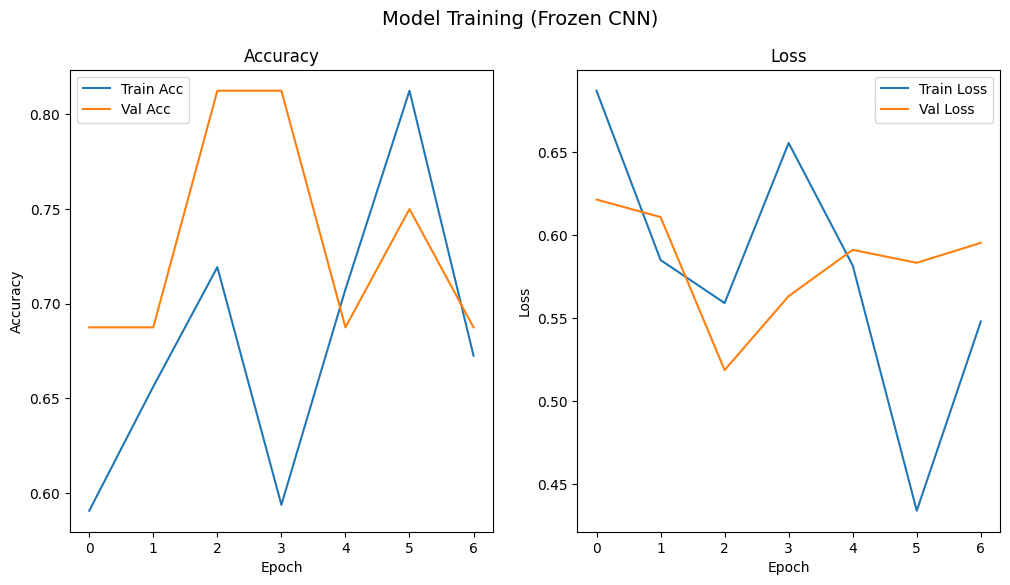

In [ ]:
import os
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Model, load_model
from tensorflow.keras.layers import Flatten, Dense, Dropout
from tensorflow.keras.applications import VGG19
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau
import matplotlib.pyplot as plt

# ✅ Paths
dataset_dir = "/content/drive/MyDrive/BrainTumorData/brain_tumor_dataset"
model_h5_path = "/content/drive/MyDrive/model_weights/brain_tumor_model.h5"
checkpoint_path = "/content/drive/MyDrive/model_weights/vgg19_model_01.weights.h5"
os.makedirs(os.path.dirname(checkpoint_path), exist_ok=True)

# ✅ Check dataset
if not os.path.exists(dataset_dir):
    raise FileNotFoundError(f"Dataset not found at {dataset_dir}")

# ✅ Data generators
train_datagen = ImageDataGenerator(rescale=1./255, validation_split=0.2)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    dataset_dir, target_size=(240, 240), batch_size=32, class_mode='categorical', subset='training')

valid_generator = train_datagen.flow_from_directory(
    dataset_dir, target_size=(240, 240), batch_size=32, class_mode='categorical', subset='validation')

test_generator = test_datagen.flow_from_directory(
    dataset_dir, target_size=(240, 240), batch_size=32, class_mode='categorical', shuffle=False)

# ✅ Sanity check
if train_generator.samples == 0 or valid_generator.samples == 0 or test_generator.samples == 0:
    raise ValueError("Check if data folders are empty!")

# ✅ Load model if exists
if os.path.exists(model_h5_path):
    print("ℹ️ Loading saved model...")
    model_01 = load_model(model_h5_path)
    print("✅ Model Loaded Successfully!")
else:
    print("ℹ️ Creating a new model...")

    # ✅ Build model
    base_model = VGG19(input_shape=(240,240,3), include_top=False, weights='imagenet')
    base_model.trainable = False

    x = Flatten()(base_model.output)
    x = Dense(4608, activation='relu')(x)
    x = Dropout(0.2)(x)
    x = Dense(1152, activation='relu')(x)
    output = Dense(2, activation='softmax')(x)

    model_01 = Model(inputs=base_model.input, outputs=output)

    # ✅ Compile
    optimizer = SGD(learning_rate=1e-4, decay=1e-6, momentum=0.9, nesterov=True)
    model_01.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])

    # ✅ Callbacks
    callbacks = [
        EarlyStopping(monitor='val_loss', patience=4, verbose=1, mode='min'),
        ModelCheckpoint(model_h5_path, monitor='val_loss', verbose=1, save_best_only=True),
        ReduceLROnPlateau(monitor='val_accuracy', patience=3, verbose=1, factor=0.5, min_lr=1e-5)
    ]

    # ✅ Train
    history_01 = model_01.fit(
        train_generator,
        steps_per_epoch=max(1, train_generator.samples // train_generator.batch_size),
        validation_data=valid_generator,
        validation_steps=max(1, valid_generator.samples // valid_generator.batch_size),
        epochs=10,
        callbacks=callbacks
    )

    # ✅ Save weights separately (optional)
    model_01.save_weights(checkpoint_path)

# ✅ Evaluation
val_loss, val_acc = model_01.evaluate(valid_generator)
test_loss, test_acc = model_01.evaluate(test_generator)
print(f"Validation Accuracy: {val_acc:.4f}, Loss: {val_loss:.4f}")
print(f"Testing Accuracy: {test_acc:.4f}, Loss: {test_loss:.4f}")

# ✅ Prediction
filenames = test_generator.filenames
nb_samples = len(filenames)

# ✅ Fixed TypeError by casting to int
vgg_prediction_01 = model_01.predict(test_generator, steps=int(np.ceil(nb_samples / 32)), verbose=1)
y_pred = np.argmax(vgg_prediction_01, axis=1)

# ✅ Plot Training
if 'history_01' in locals():
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12,6))
    fig.suptitle("Model Training (Frozen CNN)", fontsize=14)

    ax1.plot(history_01.history['accuracy'], label='Train Acc')
    ax1.plot(history_01.history['val_accuracy'], label='Val Acc')
    ax1.set_title('Accuracy'); ax1.set_xlabel('Epoch'); ax1.set_ylabel('Accuracy'); ax1.legend()

    ax2.plot(history_01.history['loss'], label='Train Loss')
    ax2.plot(history_01.history['val_loss'], label='Val Loss')
    ax2.set_title('Loss'); ax2.set_xlabel('Epoch'); ax2.set_ylabel('Loss'); ax2.legend()

    plt.savefig("training_frozencnn.jpeg", format='jpeg', dpi=100, bbox_inches='tight')
    plt.show()






In [ ]:
from tensorflow.keras.models import load_model
import os

# ✅ Define Model Path
model_path = "brain_tumor_model.h5"

# ✅ Check if Model Exists
if not os.path.exists(model_path):
    raise FileNotFoundError("⚠️ Model not found! Train and save the model first.")

# ✅ Load Model
print("ℹ️ Loading saved model...")
model_01 = load_model(model_path)

# ✅ Evaluate Model on Validation Data
if 'valid_generator' not in globals():
    raise ValueError("⚠️ Validation data generator not found! Ensure dataset is loaded correctly.")

vgg_val_eval_01 = model_01.evaluate(valid_generator)
print(f'Validation Loss: {vgg_val_eval_01[0]}')
print(f'Validation Accuracy: {vgg_val_eval_01[1]}')

ℹ️ Loading saved model...


2/2 ━━━━━━━━━━━━━━━━━━━━ 49s 14s/step - accuracy: 0.7671 - loss: 0.5213
Validation Loss: 0.5408704280853271
Validation Accuracy: 0.7599999904632568


In [ ]:
import os
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import load_model

# ✅ Define Dataset Path
dataset_dir = "/content/drive/MyDrive/BrainTumorData/brain_tumor_dataset"

if not os.path.exists(dataset_dir):
    raise FileNotFoundError("❌ Dataset path incorrect. Ensure the dataset folder exists!")

# ✅ Create Data Generator for All Images
datagen = ImageDataGenerator(rescale=1.0/255)

data_generator = datagen.flow_from_directory(
    dataset_dir,
    target_size=(240, 240),
    batch_size=32,
    class_mode='categorical',
    shuffle=False  # Don't shuffle for predictions
)

# ✅ Ensure Dataset is Not Empty
if data_generator.samples == 0:
    raise ValueError("❌ Dataset is empty! Add images to proceed.")

# ✅ Load Model (Architecture + Weights)
model_path = "/content/drive/MyDrive/model_weights/vgg19_model_01.h5"  # Ensure correct path
if not os.path.exists(model_path):
    raise FileNotFoundError("❌ Model file not found. Train and save the model first!")

model_01 = load_model(model_path)  # 🔥 Load full model (not just weights)
print("✅ Model loaded successfully!")

# ✅ Get Predictions
filenames = data_generator.filenames
nb_sample = len(filenames)
steps = max(1, nb_sample // data_generator.batch_size)

vgg_prediction_01 = model_01.predict(data_generator, steps=steps, verbose=1)
y_pred = np.argmax(vgg_prediction_01, axis=1)

print("✅ Predictions completed successfully!")


In [ ]:
# Increamental unfreezing and fine tuning

In [ ]:
base_model = VGG19(include_top=False, input_shape=(240,240,3))
base_model_layer_names = [layer.name for layer in base_model.layers]
base_model_layer_names

['input_layer_7',
 'block1_conv1',
 'block1_conv2',
 'block1_pool',
 'block2_conv1',
 'block2_conv2',
 'block2_pool',
 'block3_conv1',
 'block3_conv2',
 'block3_conv3',
 'block3_conv4',
 'block3_pool',
 'block4_conv1',
 'block4_conv2',
 'block4_conv3',
 'block4_conv4',
 'block4_pool',
 'block5_conv1',
 'block5_conv2',
 'block5_conv3',
 'block5_conv4',
 'block5_pool']

In [ ]:
import os
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Flatten, Dense, Dropout
from tensorflow.keras.applications import VGG19
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau

# ✅ Define Dataset Path
dataset_dir = "/content/drive/My Drive/BrainTumorData/brain_tumor_dataset"

# ✅ Ensure dataset exists
if not os.path.exists(dataset_dir):
    raise FileNotFoundError("❌ Dataset directory not found!")

# ✅ Image Data Generators
train_datagen = ImageDataGenerator(rescale=1.0/255, validation_split=0.2)
test_datagen = ImageDataGenerator(rescale=1.0/255)

# ✅ Load Data (Using Subset for Training & Validation)
train_generator = train_datagen.flow_from_directory(
    dataset_dir, target_size=(240, 240), batch_size=32, class_mode='categorical', subset="training")

valid_generator = train_datagen.flow_from_directory(
    dataset_dir, target_size=(240, 240), batch_size=32, class_mode='categorical', subset="validation")

test_generator = test_datagen.flow_from_directory(
    dataset_dir, target_size=(240, 240), batch_size=32, class_mode='categorical', shuffle=False)

# ✅ Ensure dataset isn't empty
if train_generator.samples == 0 or valid_generator.samples == 0 or test_generator.samples == 0:
    raise ValueError("❌ One or more datasets are empty! Check the dataset folders.")

# ✅ Load Pretrained VGG19 Model
base_model = VGG19(input_shape=(240, 240, 3), include_top=False, weights='imagenet')
for layer in base_model.layers:
    layer.trainable = False

# ✅ Define Model Architecture
x = Flatten()(base_model.output)
x = Dense(4608, activation='relu')(x)
x = Dropout(0.2)(x)
x = Dense(1152, activation='relu')(x)
output = Dense(2, activation='softmax')(x)  # 2 classes: 'no' and 'yes'

model_01 = Model(inputs=base_model.input, outputs=output)

# ✅ Compile Model
sgd = SGD(learning_rate=0.0001, decay=1e-6, momentum=0.9, nesterov=True)
model_01.compile(loss='categorical_crossentropy', optimizer=sgd, metrics=['accuracy'])

# ✅ Create Model Save Path
save_dir = "/content/drive/My Drive/BrainTumorData/model_weights/"
os.makedirs(save_dir, exist_ok=True)

checkpoint_path = os.path.join(save_dir, "vgg19_model_01.h5")

# ✅ Callbacks
es = EarlyStopping(monitor='val_loss', patience=4, verbose=1, mode='min')
cp = ModelCheckpoint(checkpoint_path, monitor='val_loss', verbose=1, save_best_only=True, mode='auto')
lrr = ReduceLROnPlateau(monitor='val_accuracy', patience=3, verbose=1, factor=0.5, min_lr=0.0001)

# ✅ Train Model
steps_per_epoch = max(1, train_generator.samples // train_generator.batch_size)
validation_steps = max(1, valid_generator.samples // valid_generator.batch_size)

history_01 = model_01.fit(
    train_generator,
    steps_per_epoch=steps_per_epoch,
    epochs=10,
    callbacks=[es, cp, lrr],
    validation_data=valid_generator,
    validation_steps=validation_steps
)

# ✅ Save Final Model
model_01.save(os.path.join(save_dir, "brain_tumor_model.h5"))
print("✅ Training Complete. Model saved successfully!")


Found 203 images belonging to 2 classes.
Found 50 images belonging to 2 classes.
Found 253 images belonging to 2 classes.
Epoch 1/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 23s/step - accuracy: 0.4217 - loss: 0.7726 
Epoch 1: val_loss improved from inf to 0.62035, saving model to /content/drive/My Drive/BrainTumorData/model_weights/vgg19_model_01.h5


6/6 ━━━━━━━━━━━━━━━━━━━━ 222s 38s/step - accuracy: 0.4358 - loss: 0.7680 - val_accuracy: 0.6562 - val_loss: 0.6203 - learning_rate: 1.0000e-04
Epoch 2/10
1/6 ━━━━━━━━━━━━━━━━━━━━ 2:56 35s/step - accuracy: 0.5312 - loss: 0.7099
Epoch 2: val_loss did not improve from 0.62035
6/6 ━━━━━━━━━━━━━━━━━━━━ 59s 5s/step - accuracy: 0.5312 - loss: 0.7099 - val_accuracy: 0.6875 - val_loss: 0.6235 - learning_rate: 1.0000e-04
Epoch 3/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 23s/step - accuracy: 0.6511 - loss: 0.6640 
Epoch 3: val_loss improved from 0.62035 to 0.54685, saving model to /content/drive/My Drive/BrainTumorData/model_weights/vgg19_model_01.h5


6/6 ━━━━━━━━━━━━━━━━━━━━ 282s 51s/step - accuracy: 0.6525 - loss: 0.6607 - val_accuracy: 0.7812 - val_loss: 0.5468 - learning_rate: 1.0000e-04
Epoch 4/10
1/6 ━━━━━━━━━━━━━━━━━━━━ 2:44 33s/step - accuracy: 0.6250 - loss: 0.6104
Epoch 4: val_loss improved from 0.54685 to 0.52708, saving model to /content/drive/My Drive/BrainTumorData/model_weights/vgg19_model_01.h5


6/6 ━━━━━━━━━━━━━━━━━━━━ 158s 25s/step - accuracy: 0.6250 - loss: 0.6104 - val_accuracy: 0.7812 - val_loss: 0.5271 - learning_rate: 1.0000e-04
Epoch 5/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 24s/step - accuracy: 0.6869 - loss: 0.5720 
Epoch 5: val_loss improved from 0.52708 to 0.52138, saving model to /content/drive/My Drive/BrainTumorData/model_weights/vgg19_model_01.h5


6/6 ━━━━━━━━━━━━━━━━━━━━ 293s 51s/step - accuracy: 0.6865 - loss: 0.5722 - val_accuracy: 0.7500 - val_loss: 0.5214 - learning_rate: 1.0000e-04
Epoch 6/10
1/6 ━━━━━━━━━━━━━━━━━━━━ 2:52 35s/step - accuracy: 0.7812 - loss: 0.5796
Epoch 6: val_loss did not improve from 0.52138
6/6 ━━━━━━━━━━━━━━━━━━━━ 89s 11s/step - accuracy: 0.7812 - loss: 0.5796 - val_accuracy: 0.6875 - val_loss: 0.5861 - learning_rate: 1.0000e-04
Epoch 7/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 25s/step - accuracy: 0.8075 - loss: 0.4769 
Epoch 7: val_loss did not improve from 0.52138
6/6 ━━━━━━━━━━━━━━━━━━━━ 202s 35s/step - accuracy: 0.8074 - loss: 0.4774 - val_accuracy: 0.6562 - val_loss: 0.5931 - learning_rate: 1.0000e-04
Epoch 8/10
1/6 ━━━━━━━━━━━━━━━━━━━━ 2:06 25s/step - accuracy: 0.6875 - loss: 0.5776
Epoch 8: val_loss did not improve from 0.52138
6/6 ━━━━━━━━━━━━━━━━━━━━ 51s 5s/step - accuracy: 0.6875 - loss: 0.5776 - val_accuracy: 0.7188 - val_loss: 0.5395 - learning_rate: 1.0000e-04
Epoch 9/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 

6/6 ━━━━━━━━━━━━━━━━━━━━ 323s 60s/step - accuracy: 0.7788 - loss: 0.4647 - val_accuracy: 0.7500 - val_loss: 0.5049 - learning_rate: 1.0000e-04
Epoch 10/10
1/6 ━━━━━━━━━━━━━━━━━━━━ 2:49 34s/step - accuracy: 0.8125 - loss: 0.4303
Epoch 10: val_loss did not improve from 0.50488
6/6 ━━━━━━━━━━━━━━━━━━━━ 80s 9s/step - accuracy: 0.8125 - loss: 0.4303 - val_accuracy: 0.7188 - val_loss: 0.5607 - learning_rate: 1.0000e-04


✅ Training Complete. Model saved successfully!


In [ ]:
sgd = SGD(learning_rate=0.0001, decay=1e-6, momentum=0.9, nesterov=True)
model_01.compile(loss='categorical_crossentropy', optimizer=sgd, metrics=['accuracy'])

In [ ]:
import os
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Flatten, Dense, Dropout
from tensorflow.keras.applications import VGG19
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau

# ✅ Correct Dataset Path (Using 'brain_tumor_dataset' as Root)
dataset_dir = "/content/drive/MyDrive/BrainTumorData/brain_tumor_dataset"

if not os.path.exists(dataset_dir):
    raise FileNotFoundError("❌ Dataset path incorrect. Ensure 'brain_tumor_dataset' exists!")

# ✅ Train-Validation Split Using `validation_split`
train_datagen = ImageDataGenerator(rescale=1.0/255, validation_split=0.2)  # 80% Train, 20% Validation

train_generator = train_datagen.flow_from_directory(
    dataset_dir,
    target_size=(240, 240),
    batch_size=32,
    class_mode='categorical',
    subset='training'  # 🟢 Use as training set
)

valid_generator = train_datagen.flow_from_directory(
    dataset_dir,
    target_size=(240, 240),
    batch_size=32,
    class_mode='categorical',
    subset='validation'  # 🔵 Use as validation set
)

# ✅ Print Dataset Sizes
print(f"Training samples: {train_generator.samples}")
print(f"Validation samples: {valid_generator.samples}")

if train_generator.samples == 0 or valid_generator.samples == 0:
    raise ValueError("❌ No images found in dataset! Check dataset structure.")

# ✅ Load Pretrained VGG19 Model
base_model = VGG19(input_shape=(240,240,3), include_top=False, weights='imagenet')
for layer in base_model.layers:
    layer.trainable = False  # Freeze pretrained layers

# ✅ Define Model Architecture
x = Flatten()(base_model.output)
class_1 = Dense(4608, activation='relu')(x)
drop_out = Dropout(0.2)(class_1)
class_2 = Dense(1152, activation='relu')(drop_out)
output = Dense(2, activation='softmax')(class_2)

# ✅ Compile Model
model = Model(base_model.input, output)
sgd = SGD(learning_rate=0.0001, decay=1e-6, momentum=0.9, nesterov=True)
model.compile(loss='categorical_crossentropy', optimizer=sgd, metrics=['accuracy'])

# ✅ Callbacks
filepath = 'brain_tumor_model.h5'
es = EarlyStopping(monitor='val_loss', patience=4, verbose=1, mode='min')
cp = ModelCheckpoint(filepath, monitor='val_loss', verbose=1, save_best_only=True, mode='auto')
lrr = ReduceLROnPlateau(monitor='val_accuracy', patience=3, verbose=1, factor=0.5, min_lr=0.0001)

# ✅ Adjust Steps Per Epoch
steps_per_epoch = max(1, train_generator.samples // train_generator.batch_size)
validation_steps = max(1, valid_generator.samples // valid_generator.batch_size)

# ✅ Train Model
history = model.fit(
    train_generator,
    steps_per_epoch=steps_per_epoch,
    epochs=10,
    callbacks=[es, cp, lrr],
    validation_data=valid_generator,
    validation_steps=validation_steps
)

# ✅ Save Model
model.save("brain_tumor_model_final.h5")
print("✅ Training Complete. Model saved successfully!")



Found 203 images belonging to 2 classes.
Found 50 images belonging to 2 classes.
Training samples: 203
Validation samples: 50


/usr/local/lib/python3.11/dist-packages/keras/src/optimizers/base_optimizer.py:86: UserWarning: Argument `decay` is no longer supported and will be ignored.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 233ms/step - accuracy: 0.4911 - loss: 0.8242
Epoch 1: val_loss improved from inf to 0.81184, saving model to brain_tumor_model.h5


6/6 ━━━━━━━━━━━━━━━━━━━━ 26s 4s/step - accuracy: 0.4998 - loss: 0.8156 - val_accuracy: 0.5938 - val_loss: 0.8118 - learning_rate: 1.0000e-04
Epoch 2/10
1/6 ━━━━━━━━━━━━━━━━━━━━ 6s 1s/step - accuracy: 0.5455 - loss: 0.6910

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/epoch_iterator.py:107: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()



Epoch 2: val_loss improved from 0.81184 to 0.64670, saving model to brain_tumor_model.h5


6/6 ━━━━━━━━━━━━━━━━━━━━ 34s 7s/step - accuracy: 0.5455 - loss: 0.6910 - val_accuracy: 0.6562 - val_loss: 0.6467 - learning_rate: 1.0000e-04
Epoch 3/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 250ms/step - accuracy: 0.6434 - loss: 0.6316
Epoch 3: val_loss improved from 0.64670 to 0.58665, saving model to brain_tumor_model.h5


6/6 ━━━━━━━━━━━━━━━━━━━━ 35s 7s/step - accuracy: 0.6452 - loss: 0.6300 - val_accuracy: 0.6562 - val_loss: 0.5866 - learning_rate: 1.0000e-04
Epoch 4/10
1/6 ━━━━━━━━━━━━━━━━━━━━ 0s 148ms/step - accuracy: 0.5455 - loss: 0.6772
Epoch 4: val_loss improved from 0.58665 to 0.52479, saving model to brain_tumor_model.h5


6/6 ━━━━━━━━━━━━━━━━━━━━ 37s 7s/step - accuracy: 0.5455 - loss: 0.6772 - val_accuracy: 0.7812 - val_loss: 0.5248 - learning_rate: 1.0000e-04
Epoch 5/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 213ms/step - accuracy: 0.7216 - loss: 0.5674
Epoch 5: val_loss did not improve from 0.52479
6/6 ━━━━━━━━━━━━━━━━━━━━ 19s 2s/step - accuracy: 0.7204 - loss: 0.5681 - val_accuracy: 0.7500 - val_loss: 0.5648 - learning_rate: 1.0000e-04
Epoch 6/10
1/6 ━━━━━━━━━━━━━━━━━━━━ 1s 226ms/step - accuracy: 0.8125 - loss: 0.5264
Epoch 6: val_loss did not improve from 0.52479
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 79ms/step - accuracy: 0.8125 - loss: 0.5264 - val_accuracy: 0.7500 - val_loss: 0.5837 - learning_rate: 1.0000e-04
Epoch 7/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 252ms/step - accuracy: 0.7505 - loss: 0.5523
Epoch 7: val_loss did not improve from 0.52479
6/6 ━━━━━━━━━━━━━━━━━━━━ 3s 330ms/step - accuracy: 0.7544 - loss: 0.5470 - val_accuracy: 0.7188 - val_loss: 0.5789 - learning_rate: 1.0000e-04
Epoch 8/10
1/6 ━━━━━━━━━━━━━━━━━━━━ 1s 2

✅ Training Complete. Model saved successfully!


Found 203 images belonging to 2 classes.
Found 50 images belonging to 2 classes.


/usr/local/lib/python3.11/dist-packages/keras/src/optimizers/base_optimizer.py:86: UserWarning: Argument `decay` is no longer supported and will be ignored.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.5987 - loss: 0.6705   

6/6 ━━━━━━━━━━━━━━━━━━━━ 38s 3s/step - accuracy: 0.5993 - loss: 0.6678 - val_accuracy: 0.6562 - val_loss: 0.6886 - learning_rate: 1.0000e-04
Epoch 2/10
1/6 ━━━━━━━━━━━━━━━━━━━━ 1s 245ms/step - accuracy: 0.6562 - loss: 0.8810

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/epoch_iterator.py:107: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 65ms/step - accuracy: 0.6562 - loss: 0.8810 - val_accuracy: 0.5312 - val_loss: 0.6907 - learning_rate: 1.0000e-04
Epoch 3/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 2s 400ms/step - accuracy: 0.5894 - loss: 0.7094 - val_accuracy: 0.5625 - val_loss: 0.6902 - learning_rate: 1.0000e-04
Epoch 4/10
1/6 ━━━━━━━━━━━━━━━━━━━━ 0s 199ms/step - accuracy: 0.7500 - loss: 0.5890

6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 119ms/step - accuracy: 0.7500 - loss: 0.5890 - val_accuracy: 0.6250 - val_loss: 0.6885 - learning_rate: 1.0000e-04
Epoch 5/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 197ms/step - accuracy: 0.5938 - loss: 0.6597

6/6 ━━━━━━━━━━━━━━━━━━━━ 3s 427ms/step - accuracy: 0.5992 - loss: 0.6577 - val_accuracy: 0.6562 - val_loss: 0.6861 - learning_rate: 1.0000e-04
Epoch 6/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - accuracy: 0.6562 - loss: 0.6572 - val_accuracy: 0.5938 - val_loss: 0.6881 - learning_rate: 1.0000e-04
Epoch 7/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 3s 431ms/step - accuracy: 0.6579 - loss: 0.6585 - val_accuracy: 0.5938 - val_loss: 0.6871 - learning_rate: 1.0000e-04
Epoch 8/10
1/6 ━━━━━━━━━━━━━━━━━━━━ 0s 198ms/step - accuracy: 0.5938 - loss: 0.6179

6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 74ms/step - accuracy: 0.5938 - loss: 0.6179 - val_accuracy: 0.7188 - val_loss: 0.6819 - learning_rate: 1.0000e-04
Epoch 9/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 5s 505ms/step - accuracy: 0.5819 - loss: 0.6668 - val_accuracy: 0.5938 - val_loss: 0.6862 - learning_rate: 1.0000e-04
Epoch 10/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 83ms/step - accuracy: 0.7188 - loss: 0.5966 - val_accuracy: 0.5938 - val_loss: 0.6857 - learning_rate: 1.0000e-04


Model saved successfully!


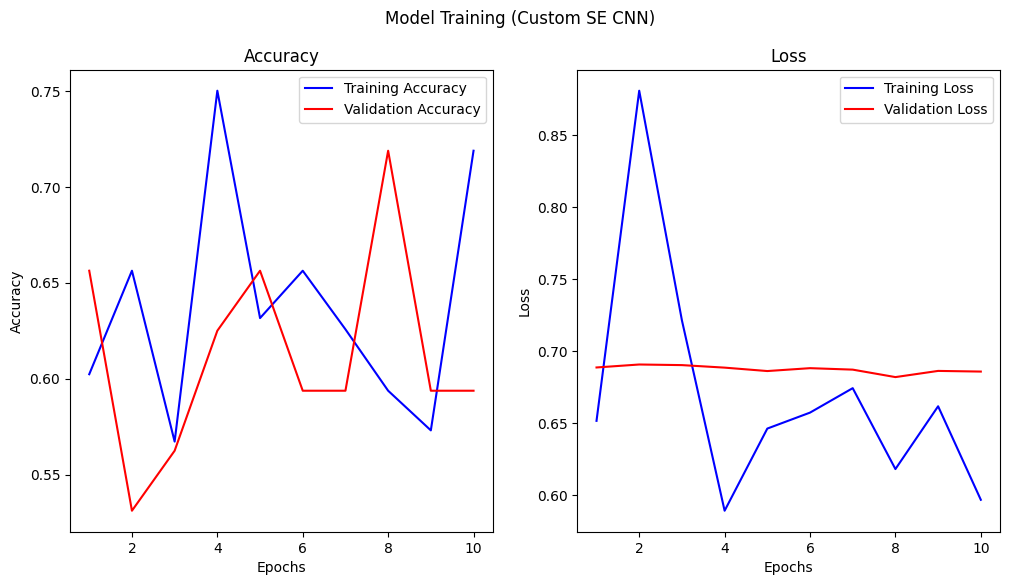

In [ ]:
import os
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras import layers, models
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau

# SE Block
def squeeze_excite_block(input_tensor, ratio=16):
    filters = input_tensor.shape[-1]
    se = layers.GlobalAveragePooling2D()(input_tensor)
    se = layers.Dense(filters // ratio, activation='swish')(se)
    se = layers.Dense(filters, activation='sigmoid')(se)
    se = layers.Reshape((1, 1, filters))(se)
    return layers.multiply([input_tensor, se])

# Convolutional block with SE and residual shortcut
def conv_block(inputs, filters, strides=(1,1), pool_size=(2,2), ratio=16):
    x = layers.Conv2D(filters, (3, 3), strides=strides, padding='same')(inputs)
    x = layers.BatchNormalization()(x)
    x = layers.Activation('swish')(x)
    x = layers.AveragePooling2D(pool_size=pool_size)(x)
    x = squeeze_excite_block(x, ratio)

    shortcut = layers.Conv2D(filters, (1,1), strides=strides, padding='same')(inputs)
    shortcut = layers.BatchNormalization()(shortcut)
    shortcut = layers.AveragePooling2D(pool_size=pool_size)(shortcut)

    x = layers.Add()([x, shortcut])
    x = layers.Activation('swish')(x)
    return x

# Build model
def build_brain_tumor_classifier(input_shape=(240, 240, 3), num_classes=2):
    inputs = layers.Input(shape=input_shape)

    x = conv_block(inputs, filters=64)
    x1 = layers.Conv2D(128, (1, 1), padding='same')(x)  # prepare for later addition
    x1 = layers.AveragePooling2D(pool_size=(2, 2))(x1)

    x = conv_block(x, filters=128)
    x = layers.Add()([x, x1])

    x2 = layers.Conv2D(256, (1, 1), padding='same')(x)
    x2 = layers.AveragePooling2D(pool_size=(2, 2))(x2)

    x = conv_block(x, filters=256)
    x = layers.Add()([x, x2])

    x = layers.GlobalAveragePooling2D()(x)
    x = layers.Dense(256, activation='swish')(x)
    x = layers.Dropout(0.5)(x)
    x = layers.Dense(128, activation='swish')(x)
    x = layers.Dropout(0.3)(x)
    outputs = layers.Dense(num_classes, activation='softmax')(x)

    model = models.Model(inputs, outputs)
    return model

# Dataset path
dataset_dir = "/content/drive/MyDrive/BrainTumorData/brain_tumor_dataset"
if not os.path.exists(dataset_dir):
    raise FileNotFoundError("Dataset directory not found!")

# Data Generators
train_datagen = ImageDataGenerator(rescale=1.0/255, validation_split=0.2)
train_generator = train_datagen.flow_from_directory(
    dataset_dir,
    target_size=(240, 240),
    batch_size=32,
    class_mode='categorical',
    subset='training'
)
valid_generator = train_datagen.flow_from_directory(
    dataset_dir,
    target_size=(240, 240),
    batch_size=32,
    class_mode='categorical',
    subset='validation'
)

# Build and compile model
model = build_brain_tumor_classifier(input_shape=(240, 240, 3), num_classes=2)

sgd = SGD(learning_rate=0.0001, decay=1e-6, momentum=0.9, nesterov=True)
model.compile(loss='categorical_crossentropy', optimizer=sgd, metrics=['accuracy'])

# Callbacks
callbacks = [
    EarlyStopping(monitor='val_loss', patience=4, verbose=1, mode='min'),
    ModelCheckpoint('brain_tumor_model.h5', monitor='val_loss', save_best_only=True, mode='auto'),
    ReduceLROnPlateau(monitor='val_accuracy', patience=3, verbose=1, factor=0.5, min_lr=0.0001)
]

# Train the model
history = model.fit(
    train_generator,
    steps_per_epoch=max(1, train_generator.samples // train_generator.batch_size),
    epochs=10,
    callbacks=callbacks,
    validation_data=valid_generator,
    validation_steps=max(1, valid_generator.samples // valid_generator.batch_size)
)

# Save model
model.save("brain_tumor_model.h5")
print("Model saved successfully!")

# Plot training results
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12,6))
fig.suptitle("Model Training (Custom SE CNN)")
epochs_list = list(range(1, len(history.history['accuracy']) + 1))

ax1.plot(epochs_list, history.history['accuracy'], 'b-', label='Training Accuracy')
ax1.plot(epochs_list, history.history['val_accuracy'], 'r-', label='Validation Accuracy')
ax1.set_title('Accuracy')
ax1.set_xlabel('Epochs')
ax1.set_ylabel('Accuracy')
ax1.legend()

ax2.plot(epochs_list, history.history['loss'], 'b-', label='Training Loss')
ax2.plot(epochs_list, history.history['val_loss'], 'r-', label='Validation Loss')
ax2.set_title('Loss')
ax2.set_xlabel('Epochs')
ax2.set_ylabel('Loss')
ax2.legend()

plt.savefig("training_custom_se_cnn.jpeg", format='jpeg', dpi=100, bbox_inches='tight')
plt.show()





In [ ]:
import os
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Model
from tensorflow.keras.layers import (Input, Conv2D, BatchNormalization, ReLU, Add, DepthwiseConv2D,
                                     GlobalAveragePooling2D, Dense, Reshape, Multiply, Flatten, Dropout)
from tensorflow.keras.applications import VGG19
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau

# ✅ Dataset Path
dataset_dir = "/content/drive/MyDrive/BrainTumorData/brain_tumor_dataset"
if not os.path.exists(dataset_dir):
    raise FileNotFoundError(f"\U0001F6A8 ERROR: Dataset directory not found: {dataset_dir}")

# ✅ Image Data Generators
datagen = ImageDataGenerator(rescale=1.0/255, validation_split=0.2)
train_generator = datagen.flow_from_directory(dataset_dir, target_size=(240, 240), batch_size=32, class_mode='categorical', subset='training')
valid_generator = datagen.flow_from_directory(dataset_dir, target_size=(240, 240), batch_size=32, class_mode='categorical', subset='validation')
test_generator = datagen.flow_from_directory(dataset_dir, target_size=(240, 240), batch_size=32, class_mode='categorical', shuffle=False, subset='validation')

# ✅ Handle Empty Dataset Error
if train_generator.samples == 0 or valid_generator.samples == 0 or test_generator.samples == 0:
    raise ValueError("\U0001F6A8 ERROR: Dataset is empty! Check if images are in the correct directories.")

# ✅ Squeeze-and-Excitation Block
def squeeze_excitation_block(input_tensor, ratio=16):
    filters = input_tensor.shape[-1]
    se = GlobalAveragePooling2D()(input_tensor)
    se = Dense(filters // ratio, activation='relu')(se)
    se = Dense(filters, activation='sigmoid')(se)
    se = Reshape((1, 1, filters))(se)
    return Multiply()([input_tensor, se])

# ✅ Inverted Residual Block with SE
def inverted_residual_block(x, filters, expansion=6, stride=1):
    input_channels = x.shape[-1]
    expanded_channels = input_channels * expansion
    x = Conv2D(expanded_channels, (1,1), padding="same", use_bias=False)(x)
    x = BatchNormalization()(x)
    x = ReLU()(x)
    x = DepthwiseConv2D((3,3), strides=stride, padding="same", use_bias=False)(x)
    x = BatchNormalization()(x)
    x = ReLU()(x)
    x = squeeze_excitation_block(x)
    x = Conv2D(filters, (1,1), padding="same", use_bias=False)(x)
    x = BatchNormalization()(x)
    return x

# ✅ Load Pretrained VGG19
vgg19 = VGG19(weights="imagenet", include_top=False, input_shape=(240, 240, 3))
vgg_features = vgg19.output

# ✅ Parallel SE-Inverted Residual Branch
x = inverted_residual_block(vgg_features, filters=512)
x = inverted_residual_block(x, filters=512)
x = inverted_residual_block(x, filters=512)

# ✅ Merge VGG19 and SE Branch
merged = Add()([vgg_features, x])
merged = squeeze_excitation_block(merged)

# ✅ Classification Head
x = GlobalAveragePooling2D()(merged)
x = Flatten()(x)
x = Dense(512, activation='relu')(x)
x = Dropout(0.2)(x)
x = Dense(256, activation='relu')(x)
output = Dense(train_generator.num_classes, activation='softmax')(x)

# ✅ Define Model
model = Model(inputs=vgg19.input, outputs=output)
model.compile(optimizer=SGD(learning_rate=0.0001, decay=1e-6, momentum=0.9, nesterov=True),
              loss='categorical_crossentropy', metrics=['accuracy'])

# ✅ Callbacks
if not os.path.isdir('model_weights/'):
    os.mkdir('model_weights/')
filepath = "model_weights/vgg19_se_model.weights.h5"
es = EarlyStopping(monitor='val_loss', patience=4, verbose=1, mode='min')
cp = ModelCheckpoint(filepath, monitor='val_loss', verbose=1, save_best_only=True, mode='auto')
lrr = ReduceLROnPlateau(monitor='val_accuracy', patience=3, verbose=1, factor=0.5, min_lr=0.0001)

# ✅ Train Model
history = model.fit(train_generator,
                    steps_per_epoch=max(1, train_generator.samples // train_generator.batch_size),
                    epochs=10,
                    callbacks=[es, cp, lrr],
                    validation_data=valid_generator,
                    validation_steps=max(1, valid_generator.samples // valid_generator.batch_size))

# ✅ Save Model
tf.keras.models.save_model(model, "model_weights/vgg19_se_model.h5")
print("\U0001F4BE Model saved successfully!")

# ✅ Evaluate Model
val_eval = model.evaluate(valid_generator)
test_eval = model.evaluate(test_generator)
print(f'Validation Accuracy: {val_eval[1]}')
print(f'Testing Accuracy: {test_eval[1]}')



Found 203 images belonging to 2 classes.
Found 50 images belonging to 2 classes.
Found 50 images belonging to 2 classes.


/usr/local/lib/python3.11/dist-packages/keras/src/optimizers/base_optimizer.py:86: UserWarning: Argument `decay` is no longer supported and will be ignored.
  warnings.warn(


Epoch 1/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 5s/step - accuracy: 0.6773 - loss: 0.6447
Epoch 1: val_loss improved from inf to 0.63034, saving model to model_weights/vgg19_se_model.weights.h5


6/6 ━━━━━━━━━━━━━━━━━━━━ 43s 6s/step - accuracy: 0.6683 - loss: 0.6482 - val_accuracy: 0.6562 - val_loss: 0.6303 - learning_rate: 1.0000e-04
Epoch 2/10
1/6 ━━━━━━━━━━━━━━━━━━━━ 3s 656ms/step - accuracy: 0.5625 - loss: 0.6858

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/epoch_iterator.py:107: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()



Epoch 2: val_loss did not improve from 0.63034
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 86ms/step - accuracy: 0.5625 - loss: 0.6858 - val_accuracy: 0.5938 - val_loss: 0.6643 - learning_rate: 1.0000e-04
Epoch 3/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 659ms/step - accuracy: 0.5935 - loss: 0.6432
Epoch 3: val_loss did not improve from 0.63034
6/6 ━━━━━━━━━━━━━━━━━━━━ 10s 891ms/step - accuracy: 0.6006 - loss: 0.6406 - val_accuracy: 0.6562 - val_loss: 0.6372 - learning_rate: 1.0000e-04
Epoch 4/10
1/6 ━━━━━━━━━━━━━━━━━━━━ 3s 644ms/step - accuracy: 0.6250 - loss: 0.6538
Epoch 4: val_loss did not improve from 0.63034
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 78ms/step - accuracy: 0.6250 - loss: 0.6538 - val_accuracy: 0.5625 - val_loss: 0.6774 - learning_rate: 1.0000e-04
Epoch 5/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 651ms/step - accuracy: 0.7660 - loss: 0.5588
Epoch 5: val_loss improved from 0.63034 to 0.60773, saving model to model_weights/vgg19_se_model.weights.h5


6/6 ━━━━━━━━━━━━━━━━━━━━ 11s 1s/step - accuracy: 0.7568 - loss: 0.5625 - val_accuracy: 0.7188 - val_loss: 0.6077 - learning_rate: 1.0000e-04
Epoch 6/10
1/6 ━━━━━━━━━━━━━━━━━━━━ 3s 633ms/step - accuracy: 0.7500 - loss: 0.5840
Epoch 6: val_loss did not improve from 0.60773
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 80ms/step - accuracy: 0.7500 - loss: 0.5840 - val_accuracy: 0.5938 - val_loss: 0.6614 - learning_rate: 1.0000e-04
Epoch 7/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 577ms/step - accuracy: 0.7706 - loss: 0.5393
Epoch 7: val_loss did not improve from 0.60773
6/6 ━━━━━━━━━━━━━━━━━━━━ 7s 653ms/step - accuracy: 0.7691 - loss: 0.5389 - val_accuracy: 0.6250 - val_loss: 0.6480 - learning_rate: 1.0000e-04
Epoch 8/10
1/6 ━━━━━━━━━━━━━━━━━━━━ 3s 641ms/step - accuracy: 0.7188 - loss: 0.5704
Epoch 8: val_loss did not improve from 0.60773
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 125ms/step - accuracy: 0.7188 - loss: 0.5704 - val_accuracy: 0.6250 - val_loss: 0.6535 - learning_rate: 1.0000e-04
Epoch 9/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s

6/6 ━━━━━━━━━━━━━━━━━━━━ 10s 820ms/step - accuracy: 0.7970 - loss: 0.5125 - val_accuracy: 0.7188 - val_loss: 0.6010 - learning_rate: 1.0000e-04
Epoch 10/10
1/6 ━━━━━━━━━━━━━━━━━━━━ 3s 645ms/step - accuracy: 0.8438 - loss: 0.5197
Epoch 10: val_loss did not improve from 0.60101
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 83ms/step - accuracy: 0.8438 - loss: 0.5197 - val_accuracy: 0.5625 - val_loss: 0.6812 - learning_rate: 1.0000e-04


💾 Model saved successfully!
2/2 ━━━━━━━━━━━━━━━━━━━━ 11s 10s/step - accuracy: 0.6321 - loss: 0.6437
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 180ms/step - accuracy: 0.5487 - loss: 0.6830
Validation Accuracy: 0.6200000047683716
Testing Accuracy: 0.6200000047683716


In [ ]:
import os
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Flatten, Dropout, Input, Conv2D, BatchNormalization, ReLU, Add, DepthwiseConv2D, GlobalAveragePooling2D, Reshape, Multiply
from tensorflow.keras.applications import VGG19
from tensorflow.keras.optimizers import Adam

# ✅ Dataset Path
dataset_dir = "/content/drive/My Drive/BrainTumorData"
if not os.path.exists(dataset_dir):
    raise FileNotFoundError(f"🚨 ERROR: Dataset directory not found: {dataset_dir}")

# ✅ Image Data Generator
datagen = ImageDataGenerator(rescale=1.0/255, validation_split=0.2)

train_generator = datagen.flow_from_directory(
    dataset_dir,
    target_size=(240, 240),
    batch_size=32,
    class_mode='categorical',
    subset='training',
    shuffle=True,
    seed=42
)

valid_generator = datagen.flow_from_directory(
    dataset_dir,
    target_size=(240, 240),
    batch_size=32,
    class_mode='categorical',
    subset='validation',
    shuffle=False,
    seed=42
)

# ✅ Number of classes
num_classes = train_generator.num_classes
print(f"Detected {num_classes} classes: {train_generator.class_indices}")

# ✅ Squeeze-and-Excitation Block
def squeeze_excitation_block(input_tensor, ratio=16):
    filters = input_tensor.shape[-1]
    se = GlobalAveragePooling2D()(input_tensor)
    se = Dense(filters // ratio, activation='relu')(se)
    se = Dense(filters, activation='sigmoid')(se)
    se = Reshape((1, 1, filters))(se)
    return Multiply()([input_tensor, se])

# ✅ Inverted Residual Block with SE
def inverted_residual_block(x, filters, expansion=6, stride=1):
    input_channels = x.shape[-1]
    expanded_channels = input_channels * expansion

    x = Conv2D(expanded_channels, (1,1), padding="same", use_bias=False)(x)
    x = BatchNormalization()(x)
    x = ReLU()(x)

    x = DepthwiseConv2D((3,3), strides=stride, padding="same", use_bias=False)(x)
    x = BatchNormalization()(x)
    x = ReLU()(x)

    x = squeeze_excitation_block(x)

    x = Conv2D(filters, (1,1), padding="same", use_bias=False)(x)
    x = BatchNormalization()(x)

    if stride == 1 and input_channels == filters:
        x = Add()([x, input_tensor])  # Residual connection

    return x

# ✅ Load Pre-trained VGG19
vgg19 = VGG19(weights="imagenet", include_top=False, input_shape=(240, 240, 3))
vgg_features = vgg19.output

# ✅ Parallel branch with Inverted Residual Blocks and SE
x = inverted_residual_block(vgg_features, filters=256)
x = inverted_residual_block(x, filters=128)
x = inverted_residual_block(x, filters=64)

# ✅ Adjust channels before adding
x = Conv2D(512, (1,1), padding="same", use_bias=False)(x)
x = BatchNormalization()(x)

# ✅ Skip Connection from VGG19 and Parallel branch
merged = Add()([vgg_features, x])
merged = squeeze_excitation_block(merged)

# ✅ Classification Head
x = GlobalAveragePooling2D()(merged)
x = Flatten()(x)
x = Dense(512, activation='relu')(x)
x = Dense(256, activation='relu')(x)
output = Dense(num_classes, activation='softmax')(x)

# ✅ Define Model
model = Model(inputs=vgg19.input, outputs=output)

# ✅ Compile Model
model.compile(optimizer=Adam(), loss="categorical_crossentropy", metrics=["accuracy"])

# ✅ Train
history = model.fit(
    train_generator,
    validation_data=valid_generator,
    epochs=10
)

# ✅ Save Weights
weights_path = "/content/drive/My Drive/model_weights/vgg19_se_updated.weights.h5"
os.makedirs(os.path.dirname(weights_path), exist_ok=True)
model.save_weights(weights_path)
print(f"✅ Weights saved to: {weights_path}")

# ✅ Evaluate
val_loss, val_accuracy = model.evaluate(valid_generator)
print(f'Validation Loss: {val_loss:.4f}')
print(f'Validation Accuracy: {val_accuracy:.4f}')

# ✅ Predictions
predictions = model.predict(valid_generator)
y_pred = np.argmax(predictions, axis=1)





Found 3077 images belonging to 5 classes.
Found 767 images belonging to 5 classes.
Detected 5 classes: {'augmented_data': 0, 'brain_tumor_dataset': 1, 'model_weights': 2, 'no': 3, 'yes': 4}
Epoch 1/10
97/97 ━━━━━━━━━━━━━━━━━━━━ 114s 882ms/step - accuracy: 0.8008 - loss: 1.1638 - val_accuracy: 0.8696 - val_loss: 0.5319
Epoch 2/10
97/97 ━━━━━━━━━━━━━━━━━━━━ 70s 718ms/step - accuracy: 0.8588 - loss: 0.5610 - val_accuracy: 0.8696 - val_loss: 0.5315
Epoch 3/10
97/97 ━━━━━━━━━━━━━━━━━━━━ 69s 711ms/step - accuracy: 0.8697 - loss: 0.5430 - val_accuracy: 0.8696 - val_loss: 0.5365
Epoch 4/10
97/97 ━━━━━━━━━━━━━━━━━━━━ 70s 719ms/step - accuracy: 0.8688 - loss: 0.5205 - val_accuracy: 0.8696 - val_loss: 0.5521
Epoch 5/10
97/97 ━━━━━━━━━━━━━━━━━━━━ 67s 690ms/step - accuracy: 0.8646 - loss: 0.5289 - val_accuracy: 0.8696 - val_loss: 0.5734
Epoch 6/10
97/97 ━━━━━━━━━━━━━━━━━━━━ 69s 713ms/step - accuracy: 0.8572 - loss: 0.5331 - val_accuracy: 0.8696 - val_loss: 0.5379
Epoch 7/10
97/97 ━━━━━━━━━━━━━━━━━━

In [ ]:
# Unfreezing the entire network

In [ ]:
import os
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Flatten, Dense, Dropout, Input, Conv2D, BatchNormalization, ReLU, Add, DepthwiseConv2D, GlobalAveragePooling2D, Reshape, Multiply
from tensorflow.keras.applications import VGG19
from tensorflow.keras.optimizers import Adam

# ✅ Define Dataset Path
dataset_dir = "/content/drive/My Drive/BrainTumorData"
if not os.path.exists(dataset_dir):
    raise FileNotFoundError(f"🚨 ERROR: Dataset directory not found: {dataset_dir}")

# ✅ Image Data Generator
datagen = ImageDataGenerator(rescale=1.0/255, validation_split=0.2)
train_generator = datagen.flow_from_directory(
    dataset_dir,
    target_size=(240, 240),
    batch_size=32,
    class_mode='categorical',
    subset='training',
    shuffle=True,
    seed=42
)
valid_generator = datagen.flow_from_directory(
    dataset_dir,
    target_size=(240, 240),
    batch_size=32,
    class_mode='categorical',
    subset='validation',
    shuffle=False,
    seed=42
)

# ✅ Squeeze-and-Excitation Block
def squeeze_excitation_block(input_tensor, ratio=16):
    filters = input_tensor.shape[-1]
    se = GlobalAveragePooling2D()(input_tensor)
    se = Dense(filters // ratio, activation='relu')(se)
    se = Dense(filters, activation='sigmoid')(se)
    se = Reshape((1, 1, filters))(se)
    return Multiply()([input_tensor, se])

# ✅ Inverted Residual Block with SE
def inverted_residual_block(x, filters, expansion=6, stride=1):
    input_channels = x.shape[-1]
    expanded_channels = input_channels * expansion

    x = Conv2D(expanded_channels, (1,1), padding="same", use_bias=False)(x)
    x = BatchNormalization()(x)
    x = ReLU()(x)

    x = DepthwiseConv2D((3,3), strides=stride, padding="same", use_bias=False)(x)
    x = BatchNormalization()(x)
    x = ReLU()(x)

    x = squeeze_excitation_block(x)

    x = Conv2D(filters, (1,1), padding="same", use_bias=False)(x)
    x = BatchNormalization()(x)

    if stride == 1 and input_channels == filters:
        x = Add()([x, input_tensor])

    return x

# ✅ Load Pre-trained VGG19
vgg19 = VGG19(weights="imagenet", include_top=False, input_shape=(240, 240, 3))
vgg_features = vgg19.output

# ✅ Parallel branch with Inverted Residual Blocks and SE
x = inverted_residual_block(vgg_features, filters=256)
x = inverted_residual_block(x, filters=128)
x = inverted_residual_block(x, filters=64)

# ✅ Adjust channels before adding
x = Conv2D(512, (1,1), padding="same", use_bias=False)(x)
x = BatchNormalization()(x)

# ✅ Skip Connection from VGG19 and Parallel branch
merged = Add()([vgg_features, x])
merged = squeeze_excitation_block(merged)

# ✅ Classification Head
x = GlobalAveragePooling2D()(merged)
x = Flatten()(x)
x = Dense(512, activation='relu')(x)
x = Dense(256, activation='relu')(x)
output = Dense(train_generator.num_classes, activation='softmax')(x)  # Adjusted for number of classes

# ✅ Define Model
model = Model(inputs=vgg19.input, outputs=output)

# ✅ Compile Model
model.compile(optimizer=Adam(), loss="categorical_crossentropy", metrics=["accuracy"])

# ✅ Train Model
epochs = 10  # Adjust as needed
history = model.fit(
    train_generator,
    validation_data=valid_generator,
    epochs=epochs
)

# ✅ Save Trained Weights
weights_path = "/content/drive/My Drive/model_weights/vgg19_trained.weights.h5"
os.makedirs(os.path.dirname(weights_path), exist_ok=True)
model.save_weights(weights_path)
print(f"✅ Weights saved to: {weights_path}")

# ✅ Evaluate Model
val_loss, val_accuracy = model.evaluate(valid_generator)
print(f'Validation Loss: {val_loss:.4f}')
print(f'Validation Accuracy: {val_accuracy:.4f}')


Found 3077 images belonging to 5 classes.
Found 767 images belonging to 5 classes.
Epoch 1/10
97/97 ━━━━━━━━━━━━━━━━━━━━ 100s 811ms/step - accuracy: 0.8356 - loss: 6.3441 - val_accuracy: 0.8696 - val_loss: 0.5323
Epoch 2/10
97/97 ━━━━━━━━━━━━━━━━━━━━ 67s 684ms/step - accuracy: 0.8721 - loss: 0.5184 - val_accuracy: 0.8696 - val_loss: 0.5672
Epoch 3/10
97/97 ━━━━━━━━━━━━━━━━━━━━ 66s 682ms/step - accuracy: 0.8706 - loss: 0.5187 - val_accuracy: 0.8696 - val_loss: 0.6141
Epoch 4/10
97/97 ━━━━━━━━━━━━━━━━━━━━ 67s 687ms/step - accuracy: 0.8683 - loss: 0.5176 - val_accuracy: 0.8696 - val_loss: 0.6497
Epoch 5/10
97/97 ━━━━━━━━━━━━━━━━━━━━ 67s 687ms/step - accuracy: 0.8679 - loss: 0.5277 - val_accuracy: 0.8696 - val_loss: 0.6830
Epoch 6/10
97/97 ━━━━━━━━━━━━━━━━━━━━ 67s 690ms/step - accuracy: 0.8728 - loss: 0.4550 - val_accuracy: 0.8696 - val_loss: 1.3641
Epoch 7/10
97/97 ━━━━━━━━━━━━━━━━━━━━ 67s 689ms/step - accuracy: 0.8564 - loss: 0.4990 - val_accuracy: 0.8696 - val_loss: 0.5713
Epoch 8/10
97

In [ ]:
model.summary()


Model: "functional_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer_4             │ (None, 240, 240, 3)    │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block1_conv1 (Conv2D)     │ (None, 240, 240, 64)   │          1,792 │ input_layer_4[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block1_conv2 (Conv2D)     │ (None, 240, 240, 64)   │         36,928 │ block1_conv1[0][0]     │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block1_pool               │ (None, 120, 120, 64)   │              0 │ block1_conv2[0][0]     │
│ (MaxPooling2D)            │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block2_conv1 (Conv2D)     │ (None, 120, 120, 128)  │         73,856 │ block1_pool[0][0]      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block2_conv2 (Conv2D)     │ (None, 120, 120, 128)  │        147,584 │ block2_conv1[0][0]     │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block2_pool               │ (None, 60, 60, 128)    │              0 │ block2_conv2[0][0]     │
│ (MaxPooling2D)            │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block3_conv1 (Conv2D)     │ (None, 60, 60, 256)    │        295,168 │ block2_pool[0][0]      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block3_conv2 (Conv2D)     │ (None, 60, 60, 256)    │        590,080 │ block3_conv1[0][0]     │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block3_conv3 (Conv2D)     │ (None, 60, 60, 256)    │        590,080 │ block3_conv2[0][0]     │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block3_conv4 (Conv2D)     │ (None, 60, 60, 256)    │        590,080 │ block3_conv3[0][0]     │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block3_pool               │ (None, 30, 30, 256)    │              0 │ block3_conv4[0][0]     │
│ (MaxPooling2D)            │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block4_conv1 (Conv2D)     │ (None, 30, 30, 512)    │      1,180,160 │ block3_pool[0][0]      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block4_conv2 (Conv2D)     │ (None, 30, 30, 512)    │      2,359,808 │ block4_conv1[0][0]     │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block4_conv3 (Conv2D)     │ (None, 30, 30, 512)    │      2,359,808 │ block4_conv2[0][0]     │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block4_conv4 (Conv2D)     │ (None, 30, 30, 512)    │      2,359,808 │ block4_conv3[0][0]     │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block4_pool               │ (None, 15, 15, 512)    │              0 │ block4_conv4[0][0]     │
│ (MaxPooling2D)            │                        │                │                        │
├──────────────────────

 Total params: 75,647,777 (288.57 MB)

 Trainable params: 25,208,117 (96.16 MB)

 Non-trainable params: 23,424 (91.50 KB)

 Optimizer params: 50,416,236 (192.32 MB)

In [ ]:
import os
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Model
from tensorflow.keras.layers import (Dense, Flatten, Dropout, Input, Conv2D, BatchNormalization,
                                     ReLU, Add, DepthwiseConv2D, GlobalAveragePooling2D, Reshape, Multiply)
from tensorflow.keras.applications import VGG19
from tensorflow.keras.optimizers import Adam

# ✅ Define Dataset Path
dataset_dir = "/content/drive/My Drive/BrainTumorData"
if not os.path.exists(dataset_dir):
    raise FileNotFoundError(f"🚨 ERROR: Dataset directory not found: {dataset_dir}")

# ✅ Image Data Generator
datagen = ImageDataGenerator(rescale=1.0/255, validation_split=0.2)
train_generator = datagen.flow_from_directory(dataset_dir, target_size=(240, 240), batch_size=32, class_mode='categorical', subset='training')
valid_generator = datagen.flow_from_directory(dataset_dir, target_size=(240, 240), batch_size=32, class_mode='categorical', subset='validation')

# ✅ Load Pre-trained VGG19
vgg19 = VGG19(weights="imagenet", include_top=False, input_shape=(240, 240, 3))
vgg_features = vgg19.output  # Shape: (7, 7, 512)

# ✅ Squeeze-and-Excitation Block
def squeeze_excitation_block(input_tensor, ratio=16):
    filters = input_tensor.shape[-1]
    se = GlobalAveragePooling2D()(input_tensor)
    se = Dense(filters // ratio, activation='relu')(se)
    se = Dense(filters, activation='sigmoid')(se)
    se = Reshape((1, 1, filters))(se)
    return Multiply()([input_tensor, se])

# ✅ Inverted Residual Block with SE
def inverted_residual_block(x, filters, expansion=6, stride=1):
    input_channels = x.shape[-1]
    expanded_channels = input_channels * expansion

    x = Conv2D(expanded_channels, (1,1), padding="same", use_bias=False)(x)
    x = BatchNormalization()(x)
    x = ReLU()(x)

    x = DepthwiseConv2D((3,3), strides=stride, padding="same", use_bias=False)(x)
    x = BatchNormalization()(x)
    x = ReLU()(x)

    x = squeeze_excitation_block(x)

    x = Conv2D(filters, (1,1), padding="same", use_bias=False)(x)
    x = BatchNormalization()(x)

    return x

# ✅ Parallel branch with Inverted Residual Blocks and SE
x = inverted_residual_block(vgg_features, filters=256)
x = inverted_residual_block(x, filters=128)
x = inverted_residual_block(x, filters=512)  # ✅ Fixed shape mismatch (changed from 64 to 512)

# ✅ Skip Connection from VGG19 and Parallel branch
merged = Add()([vgg_features, x])
merged = squeeze_excitation_block(merged)

# ✅ Classification Head
x = GlobalAveragePooling2D()(merged)
x = Flatten()(x)
x = Dense(512, activation='relu')(x)
x = Dense(256, activation='relu')(x)
output = Dense(train_generator.num_classes, activation='softmax')(x)

# ✅ Define Model
model = Model(inputs=vgg19.input, outputs=output)

# ✅ Compile Model
model.compile(optimizer=Adam(), loss="categorical_crossentropy", metrics=["accuracy"])

# ✅ Train Model
history = model.fit(train_generator, validation_data=valid_generator, epochs=10)

# ✅ Save Weights
weights_path = "/content/drive/My Drive/model_weights/vgg19_se_fixed.weights.h5"
os.makedirs(os.path.dirname(weights_path), exist_ok=True)
model.save_weights(weights_path)
print(f"✅ Weights saved to: {weights_path}")

# ✅ Evaluate Model
val_loss, val_accuracy = model.evaluate(valid_generator)
print(f'Validation Loss: {val_loss:.4f}')
print(f'Validation Accuracy: {val_accuracy:.4f}')


Found 3077 images belonging to 5 classes.
Found 767 images belonging to 5 classes.
Epoch 1/10
97/97 ━━━━━━━━━━━━━━━━━━━━ 104s 826ms/step - accuracy: 0.8160 - loss: 14.6886 - val_accuracy: 0.8696 - val_loss: 0.5663
Epoch 2/10
97/97 ━━━━━━━━━━━━━━━━━━━━ 68s 699ms/step - accuracy: 0.8602 - loss: 0.5581 - val_accuracy: 0.8696 - val_loss: 0.5260
Epoch 3/10
97/97 ━━━━━━━━━━━━━━━━━━━━ 68s 696ms/step - accuracy: 0.8669 - loss: 0.5116 - val_accuracy: 0.8696 - val_loss: 0.5922
Epoch 4/10
97/97 ━━━━━━━━━━━━━━━━━━━━ 67s 692ms/step - accuracy: 0.8710 - loss: 0.5123 - val_accuracy: 0.8696 - val_loss: 0.5657
Epoch 5/10
97/97 ━━━━━━━━━━━━━━━━━━━━ 67s 686ms/step - accuracy: 0.8847 - loss: 0.4237 - val_accuracy: 0.8696 - val_loss: 0.5219
Epoch 6/10
97/97 ━━━━━━━━━━━━━━━━━━━━ 67s 685ms/step - accuracy: 0.8680 - loss: 0.4314 - val_accuracy: 0.8357 - val_loss: 0.8543
Epoch 7/10
97/97 ━━━━━━━━━━━━━━━━━━━━ 67s 686ms/step - accuracy: 0.8780 - loss: 0.3895 - val_accuracy: 0.8696 - val_loss: 0.5727
Epoch 8/10
9